In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
# 美化 https://pbpython.com/effective-matplotlib.html
# plt.style.available

In [3]:
# plt.style.use('seaborn-dark')

# 电源店数据

In [4]:
# file_path
file_path = 'D:\\Program Files (x86)\\百度云同步盘\\Dropbox\\-E·J- 2014.5.1\\2016.12.15 店小秘数据分析'

In [5]:
# 读取店小秘订单列表.xlsx
df_dianxiaomi_order_list_recent = pd.read_excel(os.path.join(file_path, '店小秘订单列表.xlsx'))
df_dianxiaomi_order_list_all = pd.read_excel(os.path.join(file_path, '店小秘订单列表（全部订单）.xlsx'))

df_dianxiaomi_order_list = pd.concat([df_dianxiaomi_order_list_recent, df_dianxiaomi_order_list_all])

df_dianxiaomi_order_list.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,店铺名称,指定商品SKU,商品名称,库存量,货架位,仓库,称重重量(g),危险运输品,商品采购价,退款时间
0,6269aae782478a130a06c391,NaN,已发货,1005003130966569-US Plug-Black,WISH,6e01a2fb11d07b2bfa9fa1cfbe224660d,WishPost 华南EPC 17仓 - 95f115 - CA,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,205-7230480-3448303,NaN,已发货,32326661278,Amazon订单,4stj1fdvh77x0m5@marketplace.amazon.co.uk,Alan Cran,Woli 19V 4.74A 90W Laptop Ac Universal Power A...,1,GBP,...,Amazon店铺（欧盟）,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501,无货架位,默认仓库,0,无,25,NaN
2,626985aa06e28c512c774138,NaN,已发货,32326661278,WISH,b885625ad57e7c72f1523c4c0b51d82ad,WishPost 华南EPC 16仓 - e4ef6b - BE,Guangzhou Woli 19V 4.74A 90W Ac Universal Powe...,1,CNY,...,Wish店铺,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501,无货架位,默认仓库,0,无,25,NaN
3,626910a776751388deb2eee9,NaN,已发货,LS00013HP-AU Plug,WISH,5cbbf19dee8df3e72df719260169987bd,WishPost 华南EPC 16仓 - 08a816 - AU,19.5V 3.33A 65W laptop AC power adapter charge...,1,CNY,...,wish老鼠,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,62690d7a1cfd28cde69932ea,NaN,已发货,1005003130966569-EU Plug-Black,WISH,d98abccb1d754aedbd02550083ff38c0d,WishPost 华东EPC 11仓 - 5cb89c - FR,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [6]:
# 订单日期最大值
# df_dianxiaomi_order_list['下单时间'].max

In [7]:
# 添加筛选条件
df_dianxiaomi_order_list = df_dianxiaomi_order_list[(df_dianxiaomi_order_list['物流追踪号'] != '')
                                                    &~(df_dianxiaomi_order_list['平台']).isin(['Lazada订单', 'Shopee', '手工订单'])
                                                    &(df_dianxiaomi_order_list['订单状态'] == '已发货')
                                                    &(df_dianxiaomi_order_list['订单金额'] !=0)
                                                    &~(df_dianxiaomi_order_list['店铺名称'].isin(['wish老鼠', '老鼠']))
                                                   ]
df_dianxiaomi_order_list.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,店铺名称,指定商品SKU,商品名称,库存量,货架位,仓库,称重重量(g),危险运输品,商品采购价,退款时间
0,6269aae782478a130a06c391,NaN,已发货,1005003130966569-US Plug-Black,WISH,6e01a2fb11d07b2bfa9fa1cfbe224660d,WishPost 华南EPC 17仓 - 95f115 - CA,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,205-7230480-3448303,NaN,已发货,32326661278,Amazon订单,4stj1fdvh77x0m5@marketplace.amazon.co.uk,Alan Cran,Woli 19V 4.74A 90W Laptop Ac Universal Power A...,1,GBP,...,Amazon店铺（欧盟）,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501,无货架位,默认仓库,0,无,25,NaN
2,626985aa06e28c512c774138,NaN,已发货,32326661278,WISH,b885625ad57e7c72f1523c4c0b51d82ad,WishPost 华南EPC 16仓 - e4ef6b - BE,Guangzhou Woli 19V 4.74A 90W Ac Universal Powe...,1,CNY,...,Wish店铺,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501,无货架位,默认仓库,0,无,25,NaN
4,62690d7a1cfd28cde69932ea,NaN,已发货,1005003130966569-EU Plug-Black,WISH,d98abccb1d754aedbd02550083ff38c0d,WishPost 华东EPC 11仓 - 5cb89c - FR,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
5,6268bf9c68bb005c201cedfe,NaN,已发货,32602982934,WISH,a84ef66cdb33070e81fd1d5de76ecc73d,WishPost 华南EPC 15仓 - 91bc23 - US,Guangzhou Woli 19V 3.42A 65W Universal Power A...,1,CNY,...,Wish店铺,3.2603e+10,19V 3.42A 65W Universal Power Adapter Charger ...,166,无货架位,默认仓库,0,无,36,NaN


In [8]:
df_dianxiaomi_order_list.columns

Index(['订单号', '交易号', '订单状态', 'SKU', '平台', '买家账号', '买家姓名', '产品名称', '产品数量',
       '币种缩写', '订单金额', '付款方式', '退款理由', '物流费用', '订单备注', '拣货备注', '客服备注',
       '买家Email', '收货人姓名', '详细地址', '地址1', '地址2', '地址1+地址2', '收货人城市', '收货人州/省',
       '邮编', '收货人国家', '中文国家名', '国家二字码', '收货人电话', '收货人手机', '包裹号', '物流方式',
       '买家指定物流', '物流追踪号', '中文报关名', '英文报关名', '申报单价', '海关编码', '付款时间', '下单时间',
       '发货时间', '产品规格', '报关重量(g)', '多品名', '店铺名称', '指定商品SKU', '商品名称', '库存量',
       '货架位', '仓库', '称重重量(g)', '危险运输品', '商品采购价', '退款时间'],
      dtype='object')

## 运费计算

In [9]:
# 拼接多渠道运费表
# 速卖通线上
df_smt_online_shipping = pd.read_excel(os.path.join(file_path, '2017.10.24 各渠道运费明细//速卖通线上.xls'))
df_smt_online_shipping_expedited = pd.read_excel(os.path.join(file_path, '2017.10.24 各渠道运费明细//速卖通线上（快递）.xls'))

df_smt_online_shipping_merge = pd.concat([df_smt_online_shipping, df_smt_online_shipping_expedited])
df_smt_online_shipping_merge.head()

WARNING *** file size (349186) not 512 + multiple of sector size (512)
WARNING *** file size (8061) not 512 + multiple of sector size (512)


,物流订单号,AE交易订单号,国际物流单号,物流服务名称,创建时间,支付时间,订单重量,费用项,计费金额,计费币种,支付方式,支付金额,支付币种,备注,支付状态
0,5000261663293,8.149109e+15,33XHE878322101000935107,AliExpress 无忧物流-标准,24 Apr 2022 17:00,27 Apr 2022 01:11,0.267,正向配送费,40.08,CNY,支付宝（Alipay）,40.08,CNY,NaN,已支付
1,5000260818344,3.016416e+15,LS116498864NL,AliExpress 无忧物流-标准,24 Apr 2022 17:00,26 Apr 2022 23:23,0.660,正向配送费,65.92,CNY,支付宝（Alipay）,65.92,CNY,NaN,已支付
2,5000261635493,3.016415e+15,PQ7M4W0466934080138009L,AliExpress 无忧物流-标准,24 Apr 2022 17:00,26 Apr 2022 22:28,0.310,正向配送费,42.18,CNY,支付宝（Alipay）,42.18,CNY,NaN,已支付
3,5000263692923,8.149505e+15,6078996933593,AliExpress 无忧物流-标准,25 Apr 2022 17:43,26 Apr 2022 21:59,0.621,正向配送费,30.07,CNY,支付宝（Alipay）,30.07,CNY,NaN,已支付
4,5000246858444,8.148940e+15,LS114908221NL,AliExpress 无忧物流-标准,17 Apr 2022 18:48,21 Apr 2022 05:39,0.230,正向配送费,39.10,CNY,支付宝（Alipay）,39.10,CNY,NaN,已支付


In [10]:
df_smt_online_shipping_merge.columns

Index(['物流订单号', 'AE交易订单号', '国际物流单号', '物流服务名称', '创建时间', '支付时间', '订单重量', '费用项',
       '计费金额', '计费币种', '支付方式', '支付金额', '支付币种', '备注', '支付状态'],
      dtype='object')

In [11]:
df_smt_online_shipping_merge_selected_columns = ['国际物流单号', '订单重量', '支付金额']
df_smt_online_shipping_merge_selected = df_smt_online_shipping_merge[df_smt_online_shipping_merge_selected_columns]
df_smt_online_shipping_merge_selected.head()

,国际物流单号,订单重量,支付金额
0,33XHE878322101000935107,0.267,40.08
1,LS116498864NL,0.660,65.92
2,PQ7M4W0466934080138009L,0.310,42.18
3,6078996933593,0.621,30.07
4,LS114908221NL,0.230,39.10


In [12]:
df_smt_online_shipping_merge_selected = df_smt_online_shipping_merge_selected.rename(columns={'国际物流单号': '快递单号',
                                                                                              '订单重量': '重量', 
                                                                                              '支付金额': '折后资费'})
df_smt_online_shipping_merge_selected.head()

,快递单号,重量,折后资费
0,33XHE878322101000935107,0.267,40.08
1,LS116498864NL,0.660,65.92
2,PQ7M4W0466934080138009L,0.310,42.18
3,6078996933593,0.621,30.07
4,LS114908221NL,0.230,39.10


In [13]:
df_smt_online_shipping_merge_selected = df_smt_online_shipping_merge_selected.groupby(['快递单号', '重量']).agg({'折后资费': 'sum'}).reset_index()
df_smt_online_shipping_merge_selected['渠道'] = '速卖通线上'
df_smt_online_shipping_merge_selected.head()

,快递单号,重量,折后资费,渠道
0,00459007738991774615,0.310,30.62,速卖通线上
1,0082800082808514000877001,0.311,35.77,速卖通线上
2,0082800082808514001235001,0.311,35.77,速卖通线上
3,0082800082808514144852001,0.312,35.83,速卖通线上
4,0082800082808514180455001,0.309,35.67,速卖通线上


In [14]:
# wish邮
import glob

# use glob to get all the csv files 
# in the folder
# path = os.getcwd()
excel_files = glob.glob(os.path.join(file_path, '2017.10.24 各渠道运费明细//wish邮', "*.xlsx"))

df_wish_shipping_list = []

# loop over the list of csv files
for f in excel_files:
      
    # read the csv file
    df_wish_shipping_xlsx = pd.read_excel(f)
      
    # print the location and filename
    # print('Location:', f)
    # print('File Name:', f.split("\\")[-1])
      
    # print the content
    # print('Content:')
    # display(df)
    # print()
    
    # 更改部分column_name
    column_name_to_replace = {
        'Total Price Including tax (WOSP余额)': '收入 (WOSP余额)',
        'Total Price Including tax (WOSP欠款)': '收入 (WOSP欠款)'
    }
    
    df_wish_shipping_xlsx = df_wish_shipping_xlsx.rename(columns=column_name_to_replace)
    
    df_wish_shipping_list.append(df_wish_shipping_xlsx)
    
df_wish_shipping_merge = pd.concat(df_wish_shipping_list)
df_wish_shipping_merge.head()

,Order Sensitivity Tag,SKU计数,Tax Amount,Wish交易编号,Wish商户ID,产品,产品代码,备注,实际重量 (kg),支付ID,...,收入 (WOSP欠款),申报的重量 (kg),税率,类型,订单生成时间,账单类型,货币,费用类型,费用类型代码,附件
0,NaN,1,NaN,5c315994b6f99c21ef58badd,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.357,WI000260165667PR,...,0,0.35,NaN,收款,2019-01-06 18:28:33,NaN,CNY,物流费,102.0,NaN
1,NaN,1,NaN,5c31083ba52cde22408d7ec8,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.247,WI000260191796PR,...,0,0.35,NaN,收款,2019-01-06 16:31:16,NaN,CNY,物流费,102.0,NaN
2,NaN,1,NaN,5c3128d5247cca22079fe51a,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.357,WI000260277640PR,...,0,0.35,NaN,收款,2019-01-06 16:31:18,NaN,CNY,物流费,102.0,NaN
3,NaN,1,NaN,5c30bd4b51243c223c449474,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.357,WI000260281164PR,...,0,0.35,NaN,收款,2019-01-06 16:31:15,NaN,CNY,物流费,102.0,NaN
4,NaN,1,NaN,5c2ebd08fbb0256783105f4a,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.353,WI000260283427PR,...,0,0.35,NaN,收款,2019-01-05 09:23:58,NaN,CNY,物流费,102.0,NaN


In [15]:
# 添加筛选条件
df_wish_shipping_merge = df_wish_shipping_merge[df_wish_shipping_merge['支付目标'] == 'WOSP订单']
df_wish_shipping_merge.head()

,Order Sensitivity Tag,SKU计数,Tax Amount,Wish交易编号,Wish商户ID,产品,产品代码,备注,实际重量 (kg),支付ID,...,收入 (WOSP欠款),申报的重量 (kg),税率,类型,订单生成时间,账单类型,货币,费用类型,费用类型代码,附件
0,NaN,1,NaN,5c315994b6f99c21ef58badd,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.357,WI000260165667PR,...,0,0.35,NaN,收款,2019-01-06 18:28:33,NaN,CNY,物流费,102.0,NaN
1,NaN,1,NaN,5c31083ba52cde22408d7ec8,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.247,WI000260191796PR,...,0,0.35,NaN,收款,2019-01-06 16:31:16,NaN,CNY,物流费,102.0,NaN
2,NaN,1,NaN,5c3128d5247cca22079fe51a,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.357,WI000260277640PR,...,0,0.35,NaN,收款,2019-01-06 16:31:18,NaN,CNY,物流费,102.0,NaN
3,NaN,1,NaN,5c30bd4b51243c223c449474,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.357,WI000260281164PR,...,0,0.35,NaN,收款,2019-01-06 16:31:15,NaN,CNY,物流费,102.0,NaN
4,NaN,1,NaN,5c2ebd08fbb0256783105f4a,549fabd645f64d31d0563c66,YW Air Tracked Packet - General Cargo,68.0,物流费用,0.353,WI000260283427PR,...,0,0.35,NaN,收款,2019-01-05 09:23:58,NaN,CNY,物流费,102.0,NaN


In [16]:
df_wish_shipping_merge.columns

Index(['Order Sensitivity Tag', 'SKU计数', 'Tax Amount', 'Wish交易编号', 'Wish商户ID',
       '产品', '产品代码', '备注', '实际重量 (kg)', '支付ID', '支付完成时间', '支付生成时间', '支付目标',
       '支付目标ID', '收件人所在国', '收件人所在国(ISO-3)', '收入 (WOSP余额)', '收入 (WOSP欠款)',
       '申报的重量 (kg)', '税率', '类型', '订单生成时间', '账单类型', '货币', '费用类型', '费用类型代码',
       '附件'],
      dtype='object')

In [17]:
df_wish_shipping_merge_selected_columns = ['支付目标ID', '实际重量 (kg)', '收入 (WOSP余额)']
df_wish_shipping_merge_selected = df_wish_shipping_merge[df_wish_shipping_merge_selected_columns]
df_wish_shipping_merge_selected.head()

,支付目标ID,实际重量 (kg),收入 (WOSP余额)
0,UE706488245YP,0.357,27.60
1,UE706468745YP,0.247,29.29
2,UE706468762YP,0.357,36.99
3,UE706468731YP,0.357,39.17
4,UE706080448YP,0.353,38.94


In [18]:
df_wish_shipping_merge_selected = df_wish_shipping_merge_selected.rename(columns={'支付目标ID': '快递单号',
                                                                                  '实际重量 (kg)': '重量',
                                                                                  '收入 (WOSP余额)': '折后资费'})
df_wish_shipping_merge_selected.head()

,快递单号,重量,折后资费
0,UE706488245YP,0.357,27.60
1,UE706468745YP,0.247,29.29
2,UE706468762YP,0.357,36.99
3,UE706468731YP,0.357,39.17
4,UE706080448YP,0.353,38.94


In [19]:
df_wish_shipping_merge_selected = df_wish_shipping_merge_selected.groupby(['快递单号', '重量']).agg({'折后资费': 'sum'}).reset_index()
df_wish_shipping_merge_selected['渠道'] = 'Wish邮'
df_wish_shipping_merge_selected.head()

,快递单号,重量,折后资费,渠道
0,775510263310957,0.306,8.00,Wish邮
1,775510277813749,0.309,8.00,Wish邮
2,775510292914084,0.266,8.00,Wish邮
3,775510301324221,0.178,8.00,Wish邮
4,UB779307284YP,0.122,15.01,Wish邮


In [20]:
# 燕文
excel_files = glob.glob(os.path.join(file_path, '2017.10.24 各渠道运费明细//燕文', "*.xlsx"))

df_yanwen_shipping_list = []

# loop over the list of csv files
for f in excel_files:
      
    if '应收快件' in f:
        # read the csv file
        df_yanwen_shipping_xlsx = pd.read_excel(f, skiprows=4)

        # print the location and filename
        # print('Location:', f)
        # print('File Name:', f.split("\\")[-1])

        # print the content
        # print('Content:')
        # display(df)
        # print()
        df_yanwen_shipping_list.append(df_yanwen_shipping_xlsx)
    
df_yanwen_shipping_merge = pd.concat(df_yanwen_shipping_list)
df_yanwen_shipping_merge.head()

,序号,运单号,订单号,转单号,参考号,快递单日期,目的地,重量(克),产品名称,资费(元),折后资费(元),干线调拨费(元),附加费(元),账单金额(元),所属区域
0,1,UG376151318YP,XMBN071794,4205870192748927005303010174874511,UG376151318YP,2022-03-08,美国,451,燕文专线追踪-普货,56.34,56.34,0.0,0.0,56.34,华南
1,2,RV597827705CN,XMBN071801,RV597827705CN,RV597827705CN,2022-03-09,爱尔兰,486,中邮深圳挂号小包,63.62,65.53,0.0,0.0,65.53,华南
0,1,LE203895312CN,XMBN071813,LE203895312CN,LE203895312CN,2022-03-14,法国,236,中邮深圳挂号小包,33.63,34.64,0.0,0.0,34.64,华南
0,1,UG396331821YP,XMBN071895,6A23010256021,UG396331821YP,2022-03-28,法国,276,燕文专线追踪-普货,38.66,38.66,0.0,0.0,38.66,华南
1,2,UG396331804YP,XMBN071885,6A23010256151,UG396331804YP,2022-03-28,法国,236,燕文专线追踪-普货,36.10,36.10,0.0,0.0,36.10,华南


In [21]:
df_yanwen_shipping_merge.columns

Index(['序号', '运单号', '订单号', '转单号', '参考号', '快递单日期', '目的地', '重量(克)', '产品名称',
       '资费(元)', '折后资费(元)', '干线调拨费(元)', '附加费(元)', '账单金额(元)', '所属区域'],
      dtype='object')

In [22]:
df_yanwen_shipping_merge_selected_column = ['运单号', '重量(克)', '账单金额(元)']
df_yanwen_shipping_merge_selected = df_yanwen_shipping_merge[df_yanwen_shipping_merge_selected_column]
df_yanwen_shipping_merge_selected['重量(克)'] = df_yanwen_shipping_merge_selected['重量(克)']/1000
df_yanwen_shipping_merge_selected.head()

C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,运单号,重量(克),账单金额(元)
0,UG376151318YP,0.451,56.34
1,RV597827705CN,0.486,65.53
0,LE203895312CN,0.236,34.64
0,UG396331821YP,0.276,38.66
1,UG396331804YP,0.236,36.10


In [23]:
df_yanwen_shipping_merge_selected = df_yanwen_shipping_merge_selected.rename(columns={'运单号': '快递单号', 
                                                                                      '重量(克)': '重量', 
                                                                                      '账单金额(元)': '折后资费'})
df_yanwen_shipping_merge_selected.head()

,快递单号,重量,折后资费
0,UG376151318YP,0.451,56.34
1,RV597827705CN,0.486,65.53
0,LE203895312CN,0.236,34.64
0,UG396331821YP,0.276,38.66
1,UG396331804YP,0.236,36.10


In [24]:
# # 燕文退件
# excel_files = glob.glob(os.path.join(file_path, '2017.10.24 各渠道运费明细//燕文', "*.xlsx"))

# df_yanwen_shipping_return_list = []

# # loop over the list of csv files
# for f in excel_files:
      
#     if '应收退件' in f:
#         # read the csv file
#         df_yanwen_shipping_return_xlsx = pd.read_excel(f, skiprows=4)

#         # print the location and filename
#         # print('Location:', f)
#         # print('File Name:', f.split("\\")[-1])

#         # print the content
#         # print('Content:')
#         # display(df)
#         # print()
#         df_yanwen_shipping_return_list.append(df_yanwen_shipping_return_xlsx)
    
# df_yanwen_shipping_return_merge = pd.concat(df_yanwen_shipping_return_list)
# df_yanwen_shipping_return_merge.head()

In [25]:
# df_yanwen_shipping_return_merge_selected_column = ['运单号', '重量(g)', '账单金额(元)']
# df_yanwen_shipping_return_merge_selected = df_yanwen_shipping_return_merge[df_yanwen_shipping_return_merge_selected_column]
# df_yanwen_shipping_return_merge_selected['重量(g)'] = df_yanwen_shipping_return_merge_selected['重量(g)']/1000
# df_yanwen_shipping_return_merge_selected.head()

In [26]:
# df_yanwen_shipping_return_merge_selected = df_yanwen_shipping_return_merge_selected.rename(columns={'运单号': '快递单号', 
#                                                                                                     '重量(g)': '重量', 
#                                                                                                     '账单金额(元)': '折后资费'})
# df_yanwen_shipping_return_merge_selected.head()

In [27]:
# # 收件+退件 concat
# df_yanwen_shipping_merge_selected = pd.concat([df_yanwen_shipping_merge_selected, df_yanwen_shipping_return_merge_selected]) 
# df_yanwen_shipping_merge_selected.head()

In [28]:
df_yanwen_shipping_merge_selected = df_yanwen_shipping_merge_selected.groupby(['快递单号', '重量']).agg({'折后资费': 'sum'}).reset_index()
df_yanwen_shipping_merge_selected['渠道'] = '燕文'
df_yanwen_shipping_merge_selected.head()

,快递单号,重量,折后资费,渠道
0,LB014308009CN,0.846,68.21,燕文
1,LB014361724CN,0.270,44.07,燕文
2,LB014461020CN,0.494,61.84,燕文
3,LB014461033CN,0.329,48.75,燕文
4,LE203895312CN,0.236,34.64,燕文


In [29]:
# 多渠道合并运费
df_shipping_merge = pd.concat([df_yanwen_shipping_merge_selected, df_wish_shipping_merge_selected, df_smt_online_shipping_merge_selected])
df_shipping_merge.head()

,快递单号,重量,折后资费,渠道
0,LB014308009CN,0.846,68.21,燕文
1,LB014361724CN,0.270,44.07,燕文
2,LB014461020CN,0.494,61.84,燕文
3,LB014461033CN,0.329,48.75,燕文
4,LE203895312CN,0.236,34.64,燕文


## 订单与运费拼接

In [30]:
# 订单表 join 运费表
df_dianxiaomi_order_list_with_shipping = pd.merge(df_dianxiaomi_order_list, df_shipping_merge, how='left', left_on='物流追踪号', right_on='快递单号')
df_dianxiaomi_order_list_with_shipping.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,货架位,仓库,称重重量(g),危险运输品,商品采购价,退款时间,快递单号,重量,折后资费,渠道
0,6269aae782478a130a06c391,NaN,已发货,1005003130966569-US Plug-Black,WISH,6e01a2fb11d07b2bfa9fa1cfbe224660d,WishPost 华南EPC 17仓 - 95f115 - CA,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,NaN,NaN,0,NaN,NaN,NaN,WI004862898568FPL,0.444,74.03,Wish邮
1,205-7230480-3448303,NaN,已发货,32326661278,Amazon订单,4stj1fdvh77x0m5@marketplace.amazon.co.uk,Alan Cran,Woli 19V 4.74A 90W Laptop Ac Universal Power A...,1,GBP,...,无货架位,默认仓库,0,无,25,NaN,NaN,NaN,NaN,NaN
2,626985aa06e28c512c774138,NaN,已发货,32326661278,WISH,b885625ad57e7c72f1523c4c0b51d82ad,WishPost 华南EPC 16仓 - e4ef6b - BE,Guangzhou Woli 19V 4.74A 90W Ac Universal Powe...,1,CNY,...,无货架位,默认仓库,0,无,25,NaN,WI004862898347FPL,0.348,48.52,Wish邮
3,62690d7a1cfd28cde69932ea,NaN,已发货,1005003130966569-EU Plug-Black,WISH,d98abccb1d754aedbd02550083ff38c0d,WishPost 华东EPC 11仓 - 5cb89c - FR,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6268bf9c68bb005c201cedfe,NaN,已发货,32602982934,WISH,a84ef66cdb33070e81fd1d5de76ecc73d,WishPost 华南EPC 15仓 - 91bc23 - US,Guangzhou Woli 19V 3.42A 65W Universal Power A...,1,CNY,...,无货架位,默认仓库,0,无,36,NaN,NaN,NaN,NaN,NaN


In [31]:
df_dianxiaomi_order_list_with_shipping.columns

Index(['订单号', '交易号', '订单状态', 'SKU', '平台', '买家账号', '买家姓名', '产品名称', '产品数量',
       '币种缩写', '订单金额', '付款方式', '退款理由', '物流费用', '订单备注', '拣货备注', '客服备注',
       '买家Email', '收货人姓名', '详细地址', '地址1', '地址2', '地址1+地址2', '收货人城市', '收货人州/省',
       '邮编', '收货人国家', '中文国家名', '国家二字码', '收货人电话', '收货人手机', '包裹号', '物流方式',
       '买家指定物流', '物流追踪号', '中文报关名', '英文报关名', '申报单价', '海关编码', '付款时间', '下单时间',
       '发货时间', '产品规格', '报关重量(g)', '多品名', '店铺名称', '指定商品SKU', '商品名称', '库存量',
       '货架位', '仓库', '称重重量(g)', '危险运输品', '商品采购价', '退款时间', '快递单号', '重量', '折后资费',
       '渠道'],
      dtype='object')

In [32]:
df_dianxiaomi_order_list_with_shipping['下单时间'].describe()

count                   49787
unique                  49697
top       2021-01-19 11:09:17
freq                        3
Name: 下单时间, dtype: object

In [33]:
# 下单时间->下单日期
df_dianxiaomi_order_list_with_shipping['下单日期'] = pd.to_datetime(df_dianxiaomi_order_list_with_shipping['下单时间']).dt.date

In [34]:
# 下单日期->下单周
df_dianxiaomi_order_list_with_shipping['下单周'] = pd.to_datetime(df_dianxiaomi_order_list_with_shipping['下单时间']).dt.week

In [35]:
# 下单日期->下单月
df_dianxiaomi_order_list_with_shipping['下单月'] = pd.to_datetime(df_dianxiaomi_order_list_with_shipping['下单时间']).dt.month

In [36]:
# 下单日期->下单年
df_dianxiaomi_order_list_with_shipping['下单年'] = pd.to_datetime(df_dianxiaomi_order_list_with_shipping['下单时间']).dt.year

In [37]:
# 下单日期->下单年-周
df_dianxiaomi_order_list_with_shipping['下单年-周'] = df_dianxiaomi_order_list_with_shipping['下单年'].astype(str) + '-' + df_dianxiaomi_order_list_with_shipping['下单周'].astype(str)

df_dianxiaomi_order_list_with_shipping['下单年-周'] = pd.to_datetime(df_dianxiaomi_order_list_with_shipping['下单时间']).dt.strftime('%Y%U')

In [38]:
# 下单日期->下单年-月
df_dianxiaomi_order_list_with_shipping['下单年-月'] = df_dianxiaomi_order_list_with_shipping['下单年'].astype(str) + '-' + df_dianxiaomi_order_list_with_shipping['下单月'].astype(str)

df_dianxiaomi_order_list_with_shipping['下单年-月'] = pd.to_datetime(df_dianxiaomi_order_list_with_shipping['下单时间']).dt.to_period('W')

In [39]:
# 下单日期->下单年-季度
df_dianxiaomi_order_list_with_shipping['下单年-季度'] = pd.to_datetime(df_dianxiaomi_order_list_with_shipping['下单时间']).dt.strftime('%Y-%q')

In [40]:
df_dianxiaomi_order_list_with_shipping.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,重量,折后资费,渠道,下单日期,下单周,下单月,下单年,下单年-周,下单年-月,下单年-季度
0,6269aae782478a130a06c391,NaN,已发货,1005003130966569-US Plug-Black,WISH,6e01a2fb11d07b2bfa9fa1cfbe224660d,WishPost 华南EPC 17仓 - 95f115 - CA,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,0.444,74.03,Wish邮,2022-04-28,17.0,4.0,2022.0,202217,2022-04-25/2022-05-01,2022-04-28 05:08:12
1,205-7230480-3448303,NaN,已发货,32326661278,Amazon订单,4stj1fdvh77x0m5@marketplace.amazon.co.uk,Alan Cran,Woli 19V 4.74A 90W Laptop Ac Universal Power A...,1,GBP,...,NaN,NaN,NaN,2022-04-28,17.0,4.0,2022.0,202217,2022-04-25/2022-05-01,2022-04-28 03:54:31
2,626985aa06e28c512c774138,NaN,已发货,32326661278,WISH,b885625ad57e7c72f1523c4c0b51d82ad,WishPost 华南EPC 16仓 - e4ef6b - BE,Guangzhou Woli 19V 4.74A 90W Ac Universal Powe...,1,CNY,...,0.348,48.52,Wish邮,2022-04-28,17.0,4.0,2022.0,202217,2022-04-25/2022-05-01,2022-04-28 02:05:08
3,62690d7a1cfd28cde69932ea,NaN,已发货,1005003130966569-EU Plug-Black,WISH,d98abccb1d754aedbd02550083ff38c0d,WishPost 华东EPC 11仓 - 5cb89c - FR,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,NaN,NaN,NaN,2022-04-27,17.0,4.0,2022.0,202217,2022-04-25/2022-05-01,2022-04-27 17:33:42
4,6268bf9c68bb005c201cedfe,NaN,已发货,32602982934,WISH,a84ef66cdb33070e81fd1d5de76ecc73d,WishPost 华南EPC 15仓 - 91bc23 - US,Guangzhou Woli 19V 3.42A 65W Universal Power A...,1,CNY,...,NaN,NaN,NaN,2022-04-27,17.0,4.0,2022.0,202217,2022-04-25/2022-05-01,2022-04-27 12:03:48


## 限定日期计算运费

In [41]:
# 日期限定
start_date = '2022-04-01'
end_date = '2022-04-30'

df_dianxiaomi_order_list_with_shipping_selected = df_dianxiaomi_order_list_with_shipping[(df_dianxiaomi_order_list_with_shipping['下单时间']>=start_date) & (df_dianxiaomi_order_list_with_shipping['下单时间']<end_date)]
df_dianxiaomi_order_list_with_shipping_selected['下单时间'].describe()

count                     106
unique                    106
top       2022-04-10 15:03:48
freq                        1
Name: 下单时间, dtype: object

In [42]:
# 导出
df_dianxiaomi_order_list_with_shipping_selected.to_csv('店小秘订单总表.csv')

In [43]:
# 运费计算
df_dianxiaomi_order_list_with_shipping_selected['折后资费'].sum()

6285.7699999999995

## 订单趋势统计

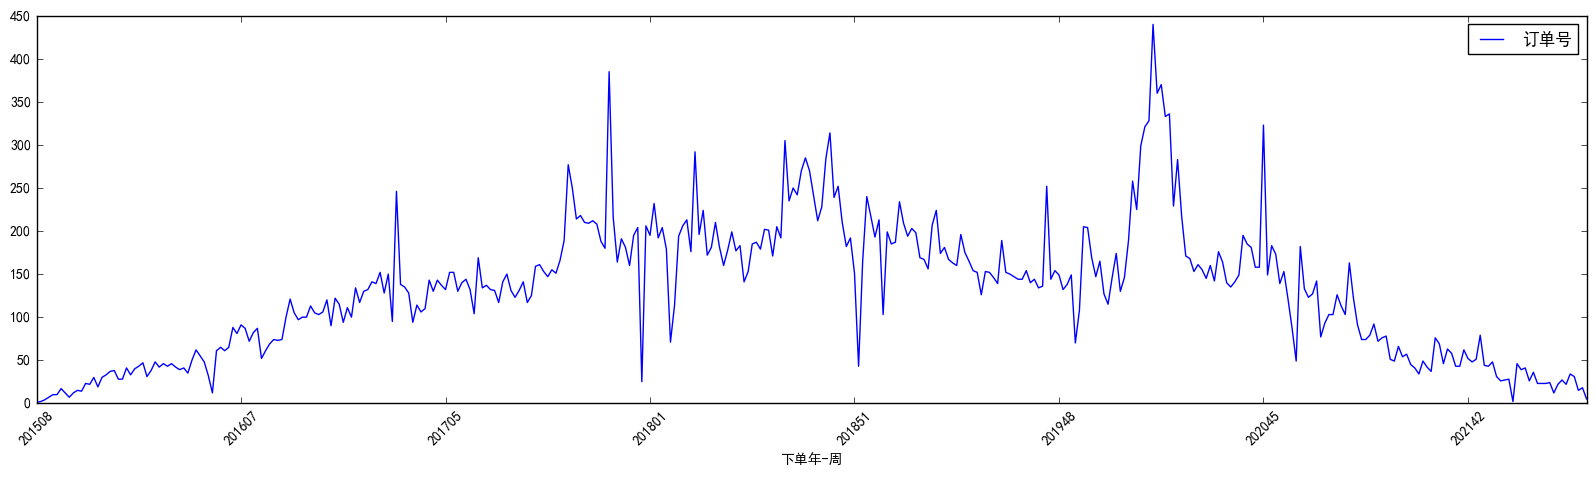

In [44]:
# 订单量统计
df_daily_order = df_dianxiaomi_order_list_with_shipping.groupby(['下单年-周']).agg({'订单号': 'count'})

df_daily_order.plot(figsize=(20,5))
plt.xticks(rotation=45)
plt.show()

# sns.set_theme(style="darkgrid")

# sns.lineplot(x="下单日期", y="订单号",
# #              hue="region", style="event",
#              data=df_daily_order)
# plt.show()

In [45]:
# import seaborn as sns
# sns.relplot(
#     data=df_daily_order.reset_index(),
#     x="下单年-周",
#     y="订单号"
# )
# plt.show()

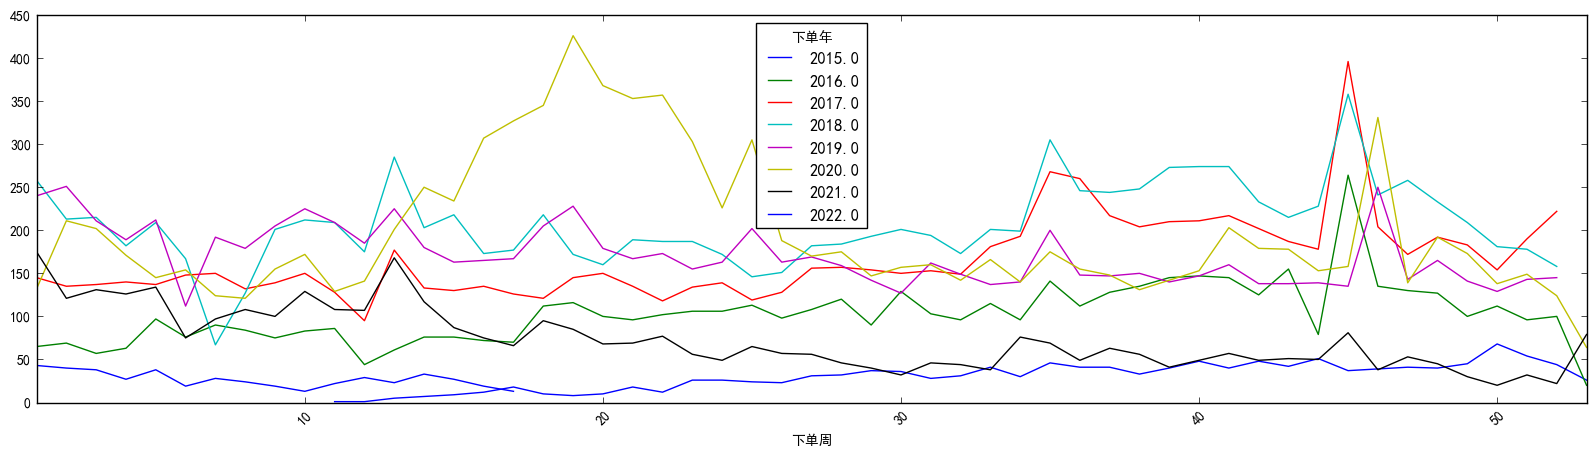

In [46]:
# 订单量统计（多年比较；周）
df_daily_order = df_dianxiaomi_order_list_with_shipping.groupby(['下单年', '下单周']).agg({'订单号': 'count'}).reset_index().pivot(index='下单周', columns='下单年', values='订单号')

df_daily_order.plot(figsize=(20,5))
plt.xticks(rotation=45)
plt.show()

# sns.set_theme(style="darkgrid")

# sns.lineplot(x="下单日期", y="订单号",
# #              hue="region", style="event",
#              data=df_daily_order)
# plt.show()

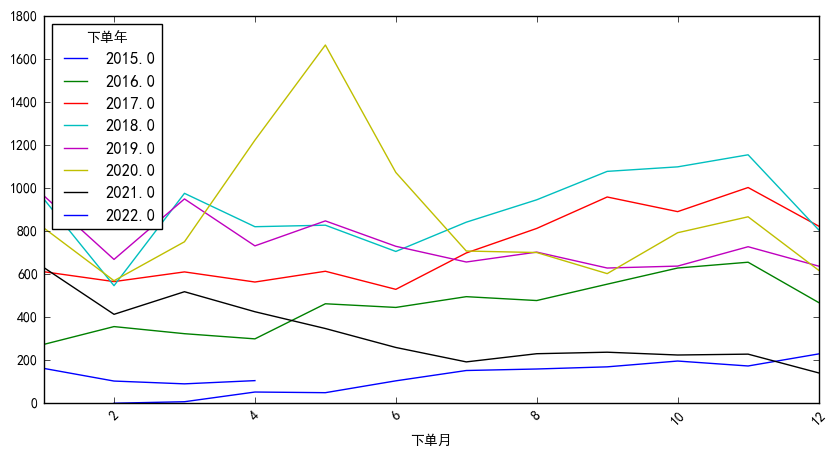

In [47]:
# 订单量统计（多年比较；月）
df_daily_order = df_dianxiaomi_order_list_with_shipping.groupby(['下单年', '下单月']).agg({'订单号': 'count'}).reset_index().pivot(index='下单月', columns='下单年', values='订单号')

df_daily_order.plot(figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

# sns.set_theme(style="darkgrid")

# sns.lineplot(x="下单日期", y="订单号",
# #              hue="region", style="event",
#              data=df_daily_order)
# plt.show()

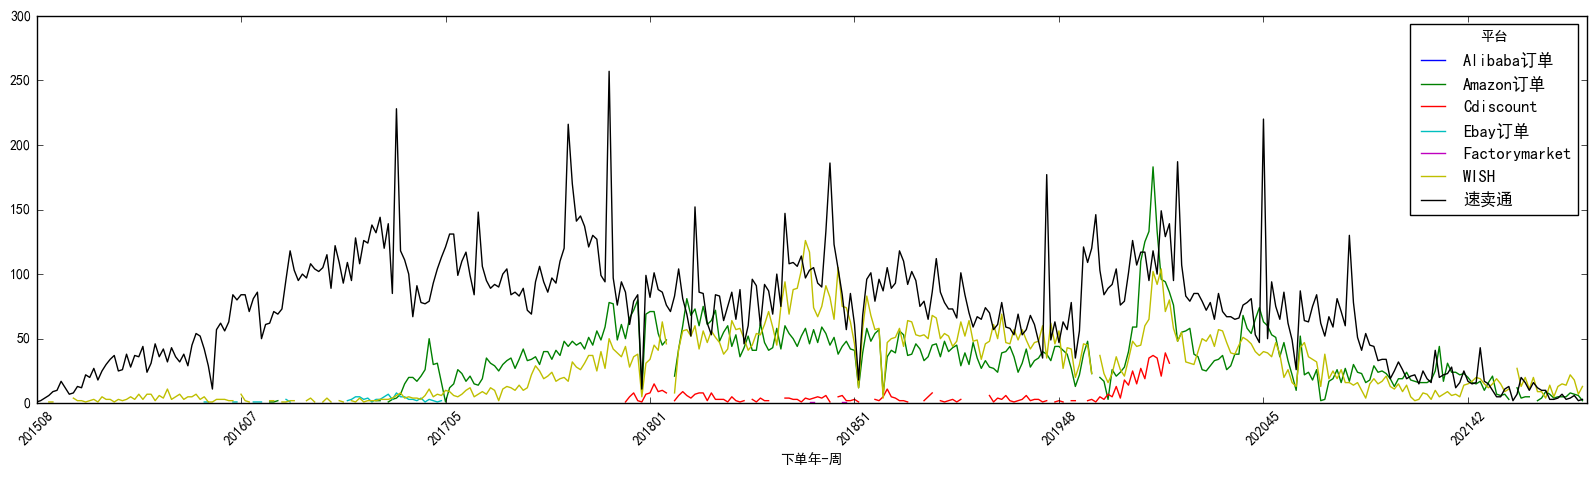

In [48]:
# 订单量统计（拆平台）
df_daily_order_by_platform = df_dianxiaomi_order_list_with_shipping.groupby(['平台','下单年-周']).agg({'订单号': 'count'}).reset_index().pivot(index='下单年-周', columns='平台', values='订单号')
# df_daily_order_by_platform
df_daily_order_by_platform.plot(figsize=(20,5))
plt.xticks(rotation=45)
plt.show()

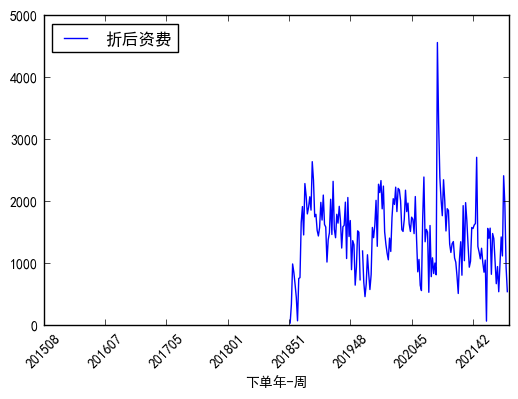

In [49]:
# 订单运费统计
df_weekly_shipping_cost = df_dianxiaomi_order_list_with_shipping.groupby(['下单年-周']).agg({'折后资费': 'sum'})
df_weekly_shipping_cost.plot()
plt.xticks(rotation=45)
plt.show()

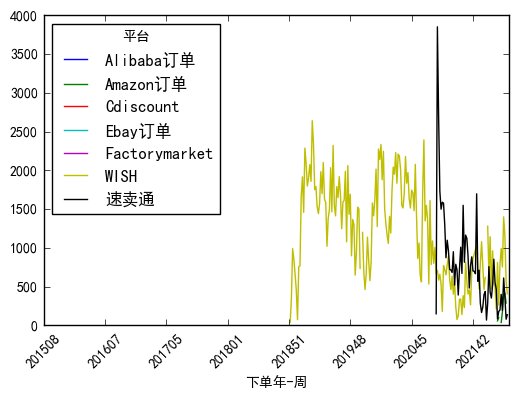

In [50]:
# 订单运费统计（拆平台）
df_weekly_shipping_cost_by_platform = df_dianxiaomi_order_list_with_shipping.groupby(['平台', '下单年-周']).agg({'折后资费': 'sum'}).reset_index().pivot(index='下单年-周', columns='平台', values='折后资费')
df_weekly_shipping_cost_by_platform.plot()
plt.xticks(rotation=45)
plt.show()

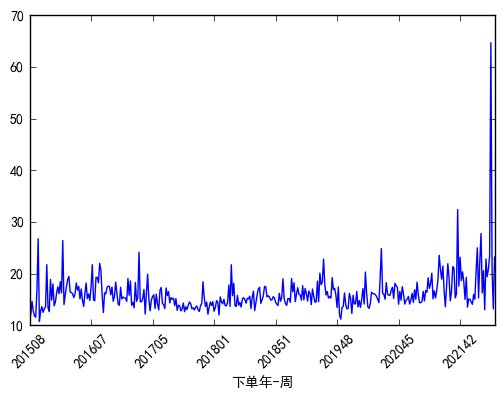

In [51]:
# 客单价统计（只看速卖通）
df_weekly_abs = df_dianxiaomi_order_list_with_shipping[df_dianxiaomi_order_list_with_shipping['平台'] == '速卖通'].groupby(['下单年-周']).agg({'订单金额': 'sum', '订单号': 'count'})
df_weekly_abs['abs'] = df_weekly_abs['订单金额'] / df_weekly_abs['订单号']
df_weekly_abs['abs'].plot()
plt.xticks(rotation=45)
plt.show()

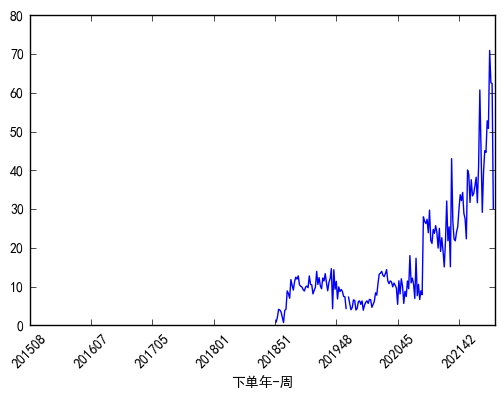

In [52]:
# 每单运费统计
df_weekly_abs = df_dianxiaomi_order_list_with_shipping.groupby(['下单年-周']).agg({'折后资费': 'sum', '订单号': 'count'})
df_weekly_abs['avg_shipping'] = df_weekly_abs['折后资费'] / df_weekly_abs['订单号']
df_weekly_abs['avg_shipping'].plot()
plt.xticks(rotation=45)
plt.show()

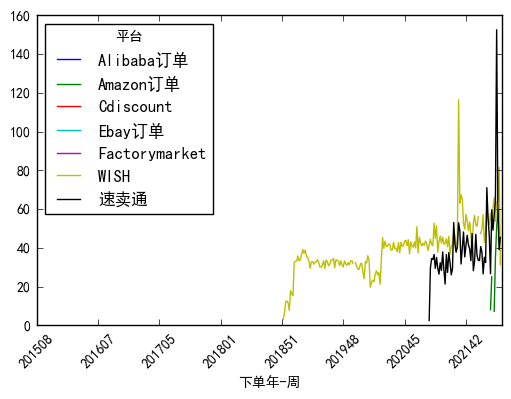

In [53]:
# 每单运费统计（拆平台）
df_weekly_abs = df_dianxiaomi_order_list_with_shipping.groupby(['平台', '下单年-周']).agg({'折后资费': 'sum', '订单号': 'count'})
df_weekly_abs['avg_shipping'] = df_weekly_abs['折后资费'] / df_weekly_abs['订单号']
df_weekly_abs.reset_index().pivot(index='下单年-周', columns='平台', values='avg_shipping').plot()
plt.xticks(rotation=45)
plt.show()

In [54]:
# 订单量top国家（速卖通）
df_orders_country = df_dianxiaomi_order_list_with_shipping[df_dianxiaomi_order_list_with_shipping['平台'] == '速卖通'].groupby(['中文国家名']).sum().sort_values(by='订单金额', ascending=False)
df_top_country = df_orders_country.head(20).reset_index()
df_top_country_list = list(df_top_country['中文国家名'])
df_top_country_list

['俄罗斯',
 '法国',
 '以色列',
 '西班牙',
 '荷兰',
 '美国',
 '比利时',
 '加拿大',
 '瑞士',
 '韩国',
 '新西兰',
 '意大利',
 '澳大利亚',
 '新加坡',
 '捷克共和国',
 '白俄罗斯',
 '葡萄牙',
 '沙特阿拉伯',
 '乌克兰',
 '日本']

In [55]:
# 订单量top国家（速卖通）；Top5
df_orders_country = df_dianxiaomi_order_list_with_shipping[df_dianxiaomi_order_list_with_shipping['平台'] == '速卖通'].groupby(['中文国家名']).sum().sort_values(by='订单金额', ascending=False)
df_top_country = df_orders_country.head(5).reset_index()
df_top_country_list_top_5 = list(df_top_country['中文国家名'])
df_top_country_list_top_5

['俄罗斯', '法国', '以色列', '西班牙', '荷兰']

In [56]:
# 订单量统计（拆国家）
df_daily_order_by_platform = df_dianxiaomi_order_list_with_shipping[(df_dianxiaomi_order_list_with_shipping['平台'] == '速卖通') & (df_dianxiaomi_order_list_with_shipping['中文国家名'].isin(df_top_country_list))].groupby(['中文国家名','下单年-月']).agg({'订单号': 'count'}).reset_index().pivot(index='中文国家名', columns='下单年-月', values='订单号')
df_daily_order_by_platform.iloc[:,[-46,-34,-22,-10,-1]]
# df_daily_order_by_platform.plot()
# plt.xticks(rotation=45)
# plt.show()

下单年-月,2021-06-14/2021-06-20,2021-09-06/2021-09-12,2021-11-29/2021-12-05,2022-02-21/2022-02-27,2022-04-25/2022-05-01
中文国家名,,,,,
乌克兰,NaN,NaN,1.0,NaN,NaN
以色列,8.0,2.0,NaN,2.0,NaN
俄罗斯,1.0,4.0,2.0,1.0,NaN
加拿大,1.0,1.0,1.0,NaN,NaN
意大利,NaN,NaN,NaN,1.0,NaN
捷克共和国,1.0,NaN,NaN,NaN,NaN
新加坡,1.0,NaN,NaN,NaN,NaN
新西兰,NaN,NaN,NaN,NaN,NaN
日本,NaN,NaN,NaN,NaN,NaN


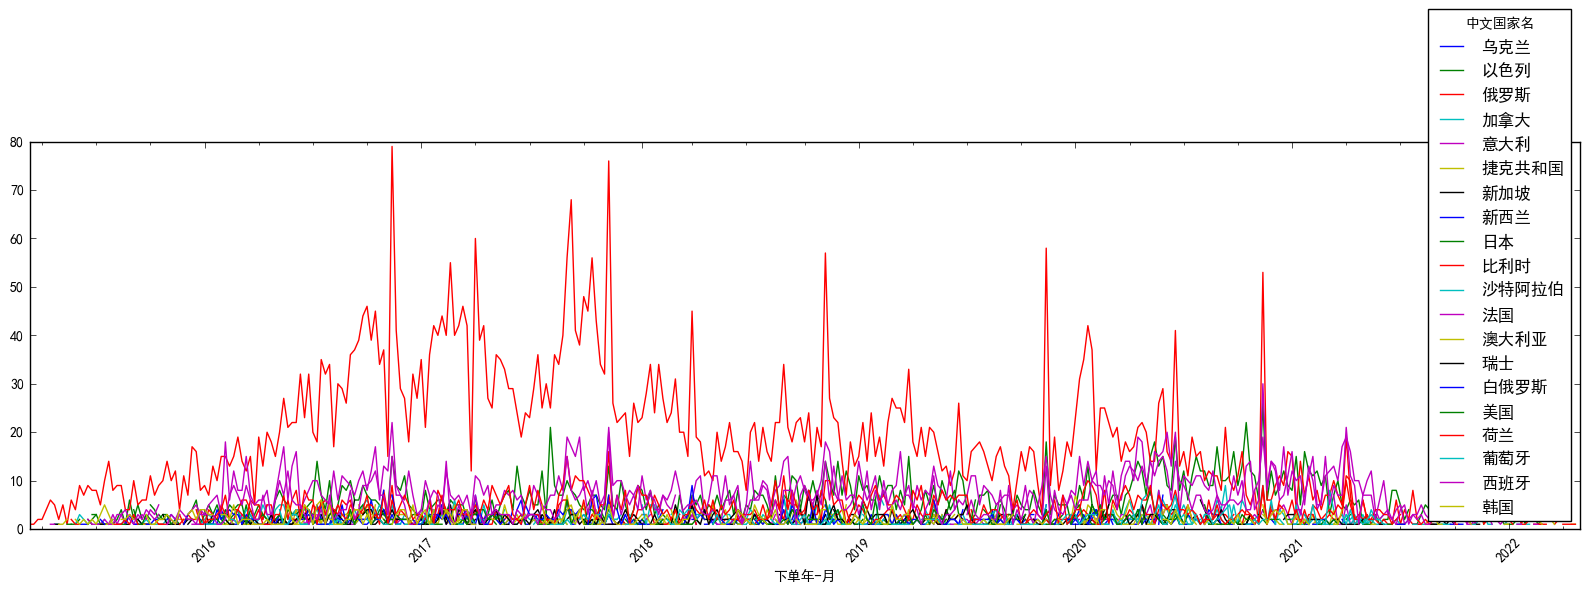

In [57]:
# 订单量统计（拆国家）
df_daily_order_by_platform = df_dianxiaomi_order_list_with_shipping[(df_dianxiaomi_order_list_with_shipping['平台'] == '速卖通') & (df_dianxiaomi_order_list_with_shipping['中文国家名'].isin(df_top_country_list))].groupby(['下单年-月','中文国家名',]).agg({'订单号': 'count'}).reset_index().pivot(index='下单年-月', columns='中文国家名', values='订单号')
df_daily_order_by_platform.plot(rot=45, figsize=(20,5))
plt.show()

In [58]:
# 计算货物成本
df_product_order_list_recent = pd.read_excel(os.path.join(file_path, '店小秘订单列表（商品维度）.xlsx'))
df_product_order_list_all = pd.read_excel(os.path.join(file_path, '店小秘订单列表（全部订单；商品粒度）.xlsx'))

df_product_order_list = pd.concat([df_product_order_list_recent, df_product_order_list_all])

df_product_order_list.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,店铺名称,指定商品SKU,商品名称,库存量,货架位,仓库,称重重量(g),危险运输品,商品采购价,退款时间
0,6269aae782478a130a06c391,NaN,已发货,1005003130966569-US Plug-Black,WISH,6e01a2fb11d07b2bfa9fa1cfbe224660d,WishPost 华南EPC 17仓 - 95f115 - CA,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,205-7230480-3448303,NaN,已发货,32326661278,Amazon订单,4stj1fdvh77x0m5@marketplace.amazon.co.uk,Alan Cran,Woli 19V 4.74A 90W Laptop Ac Universal Power A...,1,GBP,...,Amazon店铺（欧盟）,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501.0,无货架位,默认仓库,0,无,25.0,NaN
2,626985aa06e28c512c774138,NaN,已发货,32326661278,WISH,b885625ad57e7c72f1523c4c0b51d82ad,WishPost 华南EPC 16仓 - e4ef6b - BE,Guangzhou Woli 19V 4.74A 90W Ac Universal Powe...,1,CNY,...,Wish店铺,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501.0,无货架位,默认仓库,0,无,25.0,NaN
3,626910a776751388deb2eee9,NaN,已发货,LS00013HP-AU Plug,WISH,5cbbf19dee8df3e72df719260169987bd,WishPost 华南EPC 16仓 - 08a816 - AU,19.5V 3.33A 65W laptop AC power adapter charge...,1,CNY,...,wish老鼠,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,62690d7a1cfd28cde69932ea,NaN,已发货,1005003130966569-EU Plug-Black,WISH,d98abccb1d754aedbd02550083ff38c0d,WishPost 华东EPC 11仓 - 5cb89c - FR,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [59]:
df_product_order_list.columns

Index(['订单号', '交易号', '订单状态', 'SKU', '平台', '买家账号', '买家姓名', '产品名称', '产品数量',
       '币种缩写', '订单金额', '付款方式', '退款理由', '物流费用', '订单备注', '拣货备注', '客服备注',
       '买家Email', '收货人姓名', '详细地址', '地址1', '地址2', '地址1+地址2', '收货人城市', '收货人州/省',
       '邮编', '收货人国家', '中文国家名', '国家二字码', '收货人电话', '收货人手机', '包裹号', '物流方式',
       '买家指定物流', '物流追踪号', '中文报关名', '英文报关名', '申报单价', '海关编码', '付款时间', '下单时间',
       '发货时间', '产品规格', '报关重量(g)', '多品名', '店铺名称', '指定商品SKU', '商品名称', '库存量',
       '货架位', '仓库', '称重重量(g)', '危险运输品', '商品采购价', '退款时间'],
      dtype='object')

## 限定日期计算货物成本

In [60]:
# 商品成本价
df_good_cost = pd.read_excel(os.path.join(file_path, '2017.12.25 利润核算', '商品采购成本.xlsx'))
df_good_cost.head()

,sku(必填),平台SKU,识别码,商品编码,商品名称,商品状态,图片URL,实际重量（g）,采购价（RMB）,采购员,...,高(cm),来源url（超始值为：http://）,备注,英文报关,中文报关,申报重量（g）,申报金额（USD）,危险运输品,海关编码,创建时间
0,4000308845801,4000308845801,NaN,74000369,USB Type C Laptop Charger 5V 3A 9V 3A 12V 3A 1...,在售,http://productimage-1251220924.picgz.myqcloud....,300,25.0,无,...,0,NaN,NaN,Laptop Power Adapter,电源适配器,350,6,0,8.504401e+09,2019-11-29 08:44:57
1,200007763201336100,200007763201336100,NaN,74000368,19V 4.74A 90W Universal Laptop Charger Adapter...,在售,http://productimage-1251220924.picgz.myqcloud....,200,20.0,无,...,0,NaN,NaN,NaN,NaN,0,0,0,NaN,2019-11-27 08:40:25
2,33036542909,33036542909,NaN,74000367,20V 3.25A 65W USB C Type C Universal Laptop Po...,在售,http://ae01.alicdn.com/kf/HTB17EipclKw3KVjSZFO...,400,35.0,无,...,5,NaN,NaN,NaN,NaN,0,0,0,NaN,2019-06-15 09:05:09
3,33003521931,33003521931,NaN,74000366,19V 4.74A 90W Universal Laptop Power Adapter C...,在售,http://ae01.alicdn.com/kf/HTB17Ij7R5LaK1RjSZFx...,504,50.0,无,...,5,NaN,NaN,NaN,NaN,0,0,0,NaN,2019-04-26 22:56:18
4,32954401320-EUPlug,32954401320-EU Plug\n32954401320-EUPlug,NaN,74000365,26.1V 780mA Vacuum Cleaner Power Adapter Charg...,在售,http://productimage-1251220924.picgz.myqcloud....,0,40.0,无,...,0,NaN,NaN,Laptop Power Supply (AC Cord Not Included),电源适配器（不含AC线）,350,6,0,8.504401e+09,2019-02-17 09:57:50


In [61]:
# 筛选条件
df_product_order_list = df_product_order_list[(df_product_order_list['物流追踪号'] != '')
                                                    &~(df_product_order_list['平台']).isin(['Lazada订单', 'Shopee', '手工订单'])
                                                    &(df_product_order_list['订单状态'] == '已发货')
                                                    &(df_product_order_list['订单金额'] !=0)
                                                    &~(df_product_order_list['店铺名称'].isin(['wish老鼠', '老鼠']))]
df_product_order_list.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,店铺名称,指定商品SKU,商品名称,库存量,货架位,仓库,称重重量(g),危险运输品,商品采购价,退款时间
0,6269aae782478a130a06c391,NaN,已发货,1005003130966569-US Plug-Black,WISH,6e01a2fb11d07b2bfa9fa1cfbe224660d,WishPost 华南EPC 17仓 - 95f115 - CA,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,205-7230480-3448303,NaN,已发货,32326661278,Amazon订单,4stj1fdvh77x0m5@marketplace.amazon.co.uk,Alan Cran,Woli 19V 4.74A 90W Laptop Ac Universal Power A...,1,GBP,...,Amazon店铺（欧盟）,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501.0,无货架位,默认仓库,0,无,25.0,NaN
2,626985aa06e28c512c774138,NaN,已发货,32326661278,WISH,b885625ad57e7c72f1523c4c0b51d82ad,WishPost 华南EPC 16仓 - e4ef6b - BE,Guangzhou Woli 19V 4.74A 90W Ac Universal Powe...,1,CNY,...,Wish店铺,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501.0,无货架位,默认仓库,0,无,25.0,NaN
4,62690d7a1cfd28cde69932ea,NaN,已发货,1005003130966569-EU Plug-Black,WISH,d98abccb1d754aedbd02550083ff38c0d,WishPost 华东EPC 11仓 - 5cb89c - FR,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
5,6268bf9c68bb005c201cedfe,NaN,已发货,32602982934,WISH,a84ef66cdb33070e81fd1d5de76ecc73d,WishPost 华南EPC 15仓 - 91bc23 - US,Guangzhou Woli 19V 3.42A 65W Universal Power A...,1,CNY,...,Wish店铺,3.2603e+10,19V 3.42A 65W Universal Power Adapter Charger ...,166.0,无货架位,默认仓库,0,无,36.0,NaN


In [62]:
# 选择时间
df_product_order_list_selected = df_product_order_list[(df_product_order_list['下单时间']>=start_date) & (df_product_order_list['下单时间']<end_date)]
df_product_order_list_selected.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,店铺名称,指定商品SKU,商品名称,库存量,货架位,仓库,称重重量(g),危险运输品,商品采购价,退款时间
0,6269aae782478a130a06c391,NaN,已发货,1005003130966569-US Plug-Black,WISH,6e01a2fb11d07b2bfa9fa1cfbe224660d,WishPost 华南EPC 17仓 - 95f115 - CA,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,205-7230480-3448303,NaN,已发货,32326661278,Amazon订单,4stj1fdvh77x0m5@marketplace.amazon.co.uk,Alan Cran,Woli 19V 4.74A 90W Laptop Ac Universal Power A...,1,GBP,...,Amazon店铺（欧盟）,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501.0,无货架位,默认仓库,0,无,25.0,NaN
2,626985aa06e28c512c774138,NaN,已发货,32326661278,WISH,b885625ad57e7c72f1523c4c0b51d82ad,WishPost 华南EPC 16仓 - e4ef6b - BE,Guangzhou Woli 19V 4.74A 90W Ac Universal Powe...,1,CNY,...,Wish店铺,3.23267e+10,19V 4.74A 90W Laptop AC Universal Power Adapte...,98501.0,无货架位,默认仓库,0,无,25.0,NaN
4,62690d7a1cfd28cde69932ea,NaN,已发货,1005003130966569-EU Plug-Black,WISH,d98abccb1d754aedbd02550083ff38c0d,WishPost 华东EPC 11仓 - 5cb89c - FR,19V 4.74A 90W Universal Laptop Power Adapter C...,1,CNY,...,Wish店铺,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
5,6268bf9c68bb005c201cedfe,NaN,已发货,32602982934,WISH,a84ef66cdb33070e81fd1d5de76ecc73d,WishPost 华南EPC 15仓 - 91bc23 - US,Guangzhou Woli 19V 3.42A 65W Universal Power A...,1,CNY,...,Wish店铺,3.2603e+10,19V 3.42A 65W Universal Power Adapter Charger ...,166.0,无货架位,默认仓库,0,无,36.0,NaN


In [63]:
# 售出数量
df_product_item_sold = df_product_order_list_selected.groupby(['SKU']).agg({'产品数量': 'sum'})
df_product_item_sold.sort_values(by='产品数量', ascending=False).head(5)

,产品数量
SKU,
32597758635,20
32326661278,11
4000611138243,10
32326661278-1,10
12000027634514937,7


In [64]:
# 结合售价
df_product_item_sold_merge = pd.merge(df_product_item_sold.reset_index(), df_good_cost[['sku(必填)', '实际重量（g）', '采购价（RMB）']], how='left', left_on='SKU', right_on='sku(必填)')
df_product_item_sold_merge.sort_values(by='产品数量', ascending=False).head(5)

,SKU,产品数量,sku(必填),实际重量（g）,采购价（RMB）
30,32597758635,20,32597758635,386.0,25.0
22,32326661278,11,32326661278,395.0,25.0
37,4000611138243,10,NaN,NaN,NaN
23,32326661278-1,10,NaN,NaN,NaN
15,12000027634514937,7,NaN,NaN,NaN


In [65]:
# 默认采购价
df_product_item_sold_merge['采购价（RMB）'] = df_product_item_sold_merge['采购价（RMB）'].fillna(25)
df_product_item_sold_merge.sort_values(by='产品数量', ascending=False).head(5)

,SKU,产品数量,sku(必填),实际重量（g）,采购价（RMB）
30,32597758635,20,32597758635,386.0,25.0
22,32326661278,11,32326661278,395.0,25.0
37,4000611138243,10,NaN,NaN,25.0
23,32326661278-1,10,NaN,NaN,25.0
15,12000027634514937,7,NaN,NaN,25.0


In [66]:
# 计算采购总价
df_product_item_sold_merge['采购总价'] = df_product_item_sold_merge['产品数量'] * df_product_item_sold_merge['采购价（RMB）']
df_product_item_sold_merge.sort_values(by='产品数量', ascending=False).head(5)

,SKU,产品数量,sku(必填),实际重量（g）,采购价（RMB）,采购总价
30,32597758635,20,32597758635,386.0,25.0,500.0
22,32326661278,11,32326661278,395.0,25.0,275.0
37,4000611138243,10,NaN,NaN,25.0,250.0
23,32326661278-1,10,NaN,NaN,25.0,250.0
15,12000027634514937,7,NaN,NaN,25.0,175.0


In [67]:
# 采购总价
df_product_item_sold_merge['采购总价'].sum()

3224.0

In [68]:
# 运费计算
df_dianxiaomi_order_list_with_shipping_selected['折后资费'].sum()

6285.7699999999995

In [69]:
# 速卖通产品列表
df_smt_product_list = pd.read_excel(os.path.join(file_path, '速卖通产品列表.xlsx'))
df_smt_product_list.head()

,店小秘产品ID,产品名称,产品图片,白底图,场景图,产品类型,产品分组,产品简述,产品详细描述1,产品详细描述2,...,产品包装尺寸(高),运费模板,服务模板,有效期,来源url,平台产品ID,库存扣减方式,备注,创建时间,更新时间
0,25704346089259,19V 4.74A 90W Universal Power Adapter Charger ...,https://ae04.alicdn.com/kf/S7182f753c4084650a1...,https://ae04.alicdn.com/kf/Sd3616b31f49445c4b5...,NaN,14191109,NaN,NaN,"<div class=""detailmodule_image""><img class=""de...",NaN,...,7,14008676302,0,30,NaN,1005003996475228,付款减库存,NaN,2022-03-07 19:56,2022-03-19 13:27
1,25701084490985,19V 4.74A 90W AC Laptop Power Adapter Charger ...,https://ae04.alicdn.com/kf/S73bfdd11158a46dca7...,https://ae04.alicdn.com/kf/Sc080f831989048abb8...,NaN,14191109,500584713,NaN,"<div class=""detailmodule_image""><img class=""de...","ss=""detail-desc-decorate-image"" src=""http://ae...",...,5,14008676302,0,30,NaN,32298512923,付款减库存,NaN,2015-05-12 10:07,2022-03-19 13:28
2,25701084490963,19V 4.74A 90W Laptop Ac Power Adapter Charger ...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S01f6a7d96b5e4b97ad...,NaN,14191109,500521742,NaN,"<div class=""detailmodule_image""><img class=""de...",shiba-Satellite-T210D-T215D-T230-T235-T235D-Z8...,...,5,14008676302,0,30,NaN,32298098621,付款减库存,NaN,2015-05-12 10:07,2022-03-19 13:28
3,25701103722862,19V 4.74A 90W AC Laptop Power Adapter Charger ...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,NaN,14191109,500541684,NaN,"<div class=""detailmodule_image""><img class=""de...","arget=""_self"" class=""""><img class=""detail-desc...",...,4,14008676302,0,30,NaN,32483111961,付款减库存,NaN,2015-10-26 00:57,2022-03-19 13:27
4,25701084490983,19V 4.74A 90W AC Power Adapter Charger Carrega...,https://ae04.alicdn.com/kf/HTB1FTCJHVXXXXbnXpX...,NaN,NaN,14191109,500475711,NaN,"<div class=""detailmodule_image""><img class=""de...",detailMore,...,5,14008676302,0,30,NaN,32304484427,付款减库存,NaN,2015-05-12 10:07,2022-03-19 13:28


In [70]:
df_smt_product_list.columns

Index(['店小秘产品ID', '产品名称', '产品图片', '白底图', '场景图', '产品类型', '产品分组', '产品简述',
       '产品详细描述1', '产品详细描述2', '系统属性', '自定义属性', '最小计量单位', '销售方式', '每包数量', '零售价',
       '是否支持批发价', '批发最小数量', '批发优惠百分比', '交货时间', '商家编码', '价格信息', '区域调价', '自定义计重',
       '产品包装后的重量', '最少多少包内按单件运费', '增加件数', '增加重量', '产品包装尺寸(长)', '产品包装尺寸(宽)',
       '产品包装尺寸(高)', '运费模板', '服务模板', '有效期', '来源url', '平台产品ID', '库存扣减方式', '备注',
       '创建时间', '更新时间'],
      dtype='object')

In [71]:
df_smt_product_list['main_image_url'] = df_smt_product_list['产品图片'].str.split(';').str[0]
df_smt_product_list['other_image_url1'] = df_smt_product_list['产品图片'].str.split(';').str[1]
df_smt_product_list['other_image_url2'] = df_smt_product_list['产品图片'].str.split(';').str[2]
df_smt_product_list['other_image_url3'] = df_smt_product_list['产品图片'].str.split(';').str[3]
df_smt_product_list['other_image_url4'] = df_smt_product_list['产品图片'].str.split(';').str[4]
df_smt_product_list['other_image_url5'] = df_smt_product_list['产品图片'].str.split(';').str[5]
df_smt_product_list['other_image_url6'] = df_smt_product_list['产品图片'].str.split(';').str[6]
df_smt_product_list['other_image_url7'] = df_smt_product_list['产品图片'].str.split(';').str[7]
df_smt_product_list['other_image_url8'] = df_smt_product_list['产品图片'].str.split(';').str[8]
df_smt_product_list.head()

,店小秘产品ID,产品名称,产品图片,白底图,场景图,产品类型,产品分组,产品简述,产品详细描述1,产品详细描述2,...,更新时间,main_image_url,other_image_url1,other_image_url2,other_image_url3,other_image_url4,other_image_url5,other_image_url6,other_image_url7,other_image_url8
0,25704346089259,19V 4.74A 90W Universal Power Adapter Charger ...,https://ae04.alicdn.com/kf/S7182f753c4084650a1...,https://ae04.alicdn.com/kf/Sd3616b31f49445c4b5...,NaN,14191109,NaN,NaN,"<div class=""detailmodule_image""><img class=""de...",NaN,...,2022-03-19 13:27,https://ae04.alicdn.com/kf/S7182f753c4084650a1...,https://ae04.alicdn.com/kf/S3328bb86d7ca420ca0...,https://ae04.alicdn.com/kf/S1b550d1479bf420bbd...,https://ae04.alicdn.com/kf/S22d259882ce548eaa9...,https://ae04.alicdn.com/kf/Sd3616b31f49445c4b5...,https://ae04.alicdn.com/kf/Scba352af9f08481ea0...,NaN,NaN,NaN
1,25701084490985,19V 4.74A 90W AC Laptop Power Adapter Charger ...,https://ae04.alicdn.com/kf/S73bfdd11158a46dca7...,https://ae04.alicdn.com/kf/Sc080f831989048abb8...,NaN,14191109,500584713,NaN,"<div class=""detailmodule_image""><img class=""de...","ss=""detail-desc-decorate-image"" src=""http://ae...",...,2022-03-19 13:28,https://ae04.alicdn.com/kf/S73bfdd11158a46dca7...,https://ae04.alicdn.com/kf/S568bf038769f4a0eab...,https://ae04.alicdn.com/kf/S9a24ff5774d4449296...,https://ae04.alicdn.com/kf/Se0aa9aed7c754a698d...,https://ae04.alicdn.com/kf/Sc080f831989048abb8...,NaN,NaN,NaN,NaN
2,25701084490963,19V 4.74A 90W Laptop Ac Power Adapter Charger ...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S01f6a7d96b5e4b97ad...,NaN,14191109,500521742,NaN,"<div class=""detailmodule_image""><img class=""de...",shiba-Satellite-T210D-T215D-T230-T235-T235D-Z8...,...,2022-03-19 13:28,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S67560e581594485da7...,https://ae04.alicdn.com/kf/Sd55dd08a4d994d44be...,https://ae04.alicdn.com/kf/S01f6a7d96b5e4b97ad...,https://ae04.alicdn.com/kf/S74b68f20ff284877b1...,NaN,NaN,NaN,NaN
3,25701103722862,19V 4.74A 90W AC Laptop Power Adapter Charger ...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,NaN,14191109,500541684,NaN,"<div class=""detailmodule_image""><img class=""de...","arget=""_self"" class=""""><img class=""detail-desc...",...,2022-03-19 13:27,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S67560e581594485da7...,https://ae04.alicdn.com/kf/Sd55dd08a4d994d44be...,https://ae04.alicdn.com/kf/S01f6a7d96b5e4b97ad...,https://ae04.alicdn.com/kf/S74b68f20ff284877b1...,NaN,NaN,NaN,NaN
4,25701084490983,19V 4.74A 90W AC Power Adapter Charger Carrega...,https://ae04.alicdn.com/kf/HTB1FTCJHVXXXXbnXpX...,NaN,NaN,14191109,500475711,NaN,"<div class=""detailmodule_image""><img class=""de...",detailMore,...,2022-03-19 13:28,https://ae04.alicdn.com/kf/HTB1FTCJHVXXXXbnXpX...,https://ae04.alicdn.com/kf/HTB15VOMHVXXXXX9XpX...,https://ae04.alicdn.com/kf/HTB1nw5yHVXXXXbBXVX...,https://ae04.alicdn.com/kf/HTB1R7arKVXXXXbjXXX...,https://ae04.alicdn.com/kf/HTB1Ykt7KVXXXXaEaXX...,https://ae04.alicdn.com/kf/HTB11TihKVXXXXX3XFX...,NaN,NaN,NaN


In [72]:
# 添加图片
# https://stackoverflow.com/questions/53468558/adding-image-to-pandas-dataframe/53469293
# df_smt_product_list['产品主图样式'] = df_smt_product_list['main_image_url'].apply(lambda x: '<img src="'+ x + '" width="60" >')
df_smt_product_list.head()

,店小秘产品ID,产品名称,产品图片,白底图,场景图,产品类型,产品分组,产品简述,产品详细描述1,产品详细描述2,...,更新时间,main_image_url,other_image_url1,other_image_url2,other_image_url3,other_image_url4,other_image_url5,other_image_url6,other_image_url7,other_image_url8
0,25704346089259,19V 4.74A 90W Universal Power Adapter Charger ...,https://ae04.alicdn.com/kf/S7182f753c4084650a1...,https://ae04.alicdn.com/kf/Sd3616b31f49445c4b5...,NaN,14191109,NaN,NaN,"<div class=""detailmodule_image""><img class=""de...",NaN,...,2022-03-19 13:27,https://ae04.alicdn.com/kf/S7182f753c4084650a1...,https://ae04.alicdn.com/kf/S3328bb86d7ca420ca0...,https://ae04.alicdn.com/kf/S1b550d1479bf420bbd...,https://ae04.alicdn.com/kf/S22d259882ce548eaa9...,https://ae04.alicdn.com/kf/Sd3616b31f49445c4b5...,https://ae04.alicdn.com/kf/Scba352af9f08481ea0...,NaN,NaN,NaN
1,25701084490985,19V 4.74A 90W AC Laptop Power Adapter Charger ...,https://ae04.alicdn.com/kf/S73bfdd11158a46dca7...,https://ae04.alicdn.com/kf/Sc080f831989048abb8...,NaN,14191109,500584713,NaN,"<div class=""detailmodule_image""><img class=""de...","ss=""detail-desc-decorate-image"" src=""http://ae...",...,2022-03-19 13:28,https://ae04.alicdn.com/kf/S73bfdd11158a46dca7...,https://ae04.alicdn.com/kf/S568bf038769f4a0eab...,https://ae04.alicdn.com/kf/S9a24ff5774d4449296...,https://ae04.alicdn.com/kf/Se0aa9aed7c754a698d...,https://ae04.alicdn.com/kf/Sc080f831989048abb8...,NaN,NaN,NaN,NaN
2,25701084490963,19V 4.74A 90W Laptop Ac Power Adapter Charger ...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S01f6a7d96b5e4b97ad...,NaN,14191109,500521742,NaN,"<div class=""detailmodule_image""><img class=""de...",shiba-Satellite-T210D-T215D-T230-T235-T235D-Z8...,...,2022-03-19 13:28,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S67560e581594485da7...,https://ae04.alicdn.com/kf/Sd55dd08a4d994d44be...,https://ae04.alicdn.com/kf/S01f6a7d96b5e4b97ad...,https://ae04.alicdn.com/kf/S74b68f20ff284877b1...,NaN,NaN,NaN,NaN
3,25701103722862,19V 4.74A 90W AC Laptop Power Adapter Charger ...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,NaN,14191109,500541684,NaN,"<div class=""detailmodule_image""><img class=""de...","arget=""_self"" class=""""><img class=""detail-desc...",...,2022-03-19 13:27,https://ae04.alicdn.com/kf/S28315c15974e4645a6...,https://ae04.alicdn.com/kf/S67560e581594485da7...,https://ae04.alicdn.com/kf/Sd55dd08a4d994d44be...,https://ae04.alicdn.com/kf/S01f6a7d96b5e4b97ad...,https://ae04.alicdn.com/kf/S74b68f20ff284877b1...,NaN,NaN,NaN,NaN
4,25701084490983,19V 4.74A 90W AC Power Adapter Charger Carrega...,https://ae04.alicdn.com/kf/HTB1FTCJHVXXXXbnXpX...,NaN,NaN,14191109,500475711,NaN,"<div class=""detailmodule_image""><img class=""de...",detailMore,...,2022-03-19 13:28,https://ae04.alicdn.com/kf/HTB1FTCJHVXXXXbnXpX...,https://ae04.alicdn.com/kf/HTB15VOMHVXXXXX9XpX...,https://ae04.alicdn.com/kf/HTB1nw5yHVXXXXbBXVX...,https://ae04.alicdn.com/kf/HTB1R7arKVXXXXbjXXX...,https://ae04.alicdn.com/kf/HTB1Ykt7KVXXXXaEaXX...,https://ae04.alicdn.com/kf/HTB11TihKVXXXXX3XFX...,NaN,NaN,NaN


In [73]:
df_smt_product_list = df_smt_product_list[['平台产品ID', 'main_image_url']]
df_smt_product_list.head()

,平台产品ID,main_image_url
0,1005003996475228,https://ae04.alicdn.com/kf/S7182f753c4084650a1...
1,32298512923,https://ae04.alicdn.com/kf/S73bfdd11158a46dca7...
2,32298098621,https://ae04.alicdn.com/kf/S28315c15974e4645a6...
3,32483111961,https://ae04.alicdn.com/kf/S28315c15974e4645a6...
4,32304484427,https://ae04.alicdn.com/kf/HTB1FTCJHVXXXXbnXpX...


In [74]:
# 在dataframe中展示图片
# https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe

# import glob
# import random
# import base64
# import pandas as pd

# from PIL import Image
# from io import BytesIO
# from IPython.display import HTML

# import io
# import urllib.request

In [75]:
# pd.set_option('display.max_colwidth', -1)

# def get_thumbnail(path):
    
#     # 读取线上jpg
#     # https://stackoverflow.com/questions/40911170/python-how-to-read-an-image-from-a-url
#     with urllib.request.urlopen(path) as url:
#         f = io.BytesIO(url.read())
    
#     i = Image.open(f)
#     i.thumbnail((150, 150), Image.LANCZOS)
#     return i

# def image_base64(im):
#     if isinstance(im, str):
#         im = get_thumbnail(im)
#     with BytesIO() as buffer:
#         im.save(buffer, 'jpeg')
#         return base64.b64encode(buffer.getvalue()).decode()

# def image_formatter(im):
#     return '<img src="data:image/jpeg;base64,{image_base64('+ im +')}">'

In [76]:
# df_smt_product_list['image'] = df_smt_product_list['main_image_url'].map(lambda f: get_thumbnail(f))

In [77]:
# df_smt_product_list

In [78]:
# displaying PIL.Image objects embedded in dataframe
# HTML(df_smt_product_list[['平台产品ID', 'image']].to_html(formatters={'image': image_formatter}, escape=False))

## 速卖通物流渠道

In [79]:
# 速卖通店铺，近60天发货使用的物流渠道
# 日期限定
from datetime import date, datetime, timedelta

# start_date = '2021-09-01'
# end_date = '2021-09-30'

d_1 = date.today() - timedelta(days=1)
d_60 = date.today() - timedelta(days=60)

start_date = d_60.strftime("%Y-%m-%d")
end_date = d_1.strftime("%Y-%m-%d")

df_dianxiaomi_order_list_with_shipping_selected_logistics = df_dianxiaomi_order_list_with_shipping[
    (df_dianxiaomi_order_list_with_shipping['下单时间'] >= start_date) 
    & (df_dianxiaomi_order_list_with_shipping['下单时间'] < end_date)
    & (df_dianxiaomi_order_list_with_shipping['平台'] == '速卖通')
]
df_dianxiaomi_order_list_with_shipping_selected_logistics.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,重量,折后资费,渠道,下单日期,下单周,下单月,下单年,下单年-周,下单年-月,下单年-季度
12,8149504778036214,NaN,已发货,1005003253147998,速卖通,kr1421079214jspae,hgh231096 user,Adjustable AC To DC Power Supply 5V 6V 9V 12V ...,1,USD,...,0.621,30.07,速卖通线上,2022-04-25,17.0,4.0,2022.0,202217,2022-04-25/2022-05-01,2022-04-25 00:30:43
14,8149109360339258,NaN,已发货,1005004052325774,速卖通,sg1081238158,Benjamin Sua,20V4.75A 95W Type-C Notebook adapter Charger f...,1,USD,...,0.267,40.08,速卖通线上,2022-04-24,16.0,4.0,2022.0,202217,2022-04-18/2022-04-24,2022-04-24 16:44:29
15,3016415523479145,NaN,已发货,32597758635,速卖通,nl1116381837ieqx,Panl Vissers,19V 4.74A 90W Universal Power Adapter Charger ...,2,USD,...,0.660,65.92,速卖通线上,2022-04-24,16.0,4.0,2022.0,202217,2022-04-18/2022-04-24,2022-04-24 10:33:16
23,3016415226392717,NaN,已发货,32597758635,速卖通,es1181706588ljvi,JOSE DEZ CARBALLO,19V 4.74A 90W Universal Power Adapter Charger ...,1,USD,...,0.310,42.18,速卖通线上,2022-04-22,16.0,4.0,2022.0,202216,2022-04-18/2022-04-24,2022-04-22 03:34:18
32,8149203579036185,NaN,已发货,1005003288900332,速卖通,cz2000944231bfpae,ae772987 user,for Apple Notebook power adapter 60W Macbook ...,1,USD,...,0.229,35.75,速卖通线上,2022-04-17,15.0,4.0,2022.0,202216,2022-04-11/2022-04-17,2022-04-17 16:12:27


In [80]:
# df_dianxiaomi_order_list_with_shipping_selected_logistics.groupby(['物流方式', '中文国家名']).agg({'订单号': 'count'})
df_dianxiaomi_order_list_with_shipping_selected_logistics.groupby(['物流方式']).agg({'订单号': 'count'}).sort_values(by='订单号', ascending=False)

,订单号
物流方式,
速卖通线上发货-菜鸟无忧物流-标准--广州（递四方）仓,33
速卖通线上发货-菜鸟无忧物流-优先--广州（递四方）仓,1


## 爆款电源 价格与销量的关系

In [81]:
# 爆款多用电源近期的价格变化
df_top_product_order_list = df_product_order_list[
    (df_product_order_list['下单时间'] >= '2020-01-01') 
#     & (df_product_order_list['下单时间'] < end_date)
    & (df_product_order_list['SKU'] == '32597758635')
    & (df_product_order_list['平台'] == '速卖通')
]
df_top_product_order_list.head()

,订单号,交易号,订单状态,SKU,平台,买家账号,买家姓名,产品名称,产品数量,币种缩写,...,店铺名称,指定商品SKU,商品名称,库存量,货架位,仓库,称重重量(g),危险运输品,商品采购价,退款时间
17,3016415523479145,NaN,已发货,32597758635,速卖通,nl1116381837ieqx,Panl Vissers,19V 4.74A 90W Universal Power Adapter Charger ...,2,USD,...,速卖通店铺,3.25978e+10,18.5V 19V 19.5V 20V 4.74A 90W Universal Power ...,99924.0,无货架位,默认仓库,0,无,50.0,NaN
26,3016415226392717,NaN,已发货,32597758635,速卖通,es1181706588ljvi,JOSE DEZ CARBALLO,19V 4.74A 90W Universal Power Adapter Charger ...,1,USD,...,速卖通店铺,3.25978e+10,18.5V 19V 19.5V 20V 4.74A 90W Universal Power ...,99924.0,无货架位,默认仓库,0,无,25.0,NaN
48,5019189722880782,NaN,已发货,32597758635,速卖通,md1092031198,Ruslan Raileanu,19V 4.74A 90W Universal Power Adapter Charger ...,1,USD,...,速卖通店铺,3.25978e+10,18.5V 19V 19.5V 20V 4.74A 90W Universal Power ...,99924.0,无货架位,默认仓库,0,无,25.0,NaN
51,8149029415346872,NaN,已发货,32597758635,速卖通,au768767853yvhae,Mitchell Hooper,19V 4.74A 90W Universal Power Adapter Charger ...,1,USD,...,速卖通店铺,3.25978e+10,18.5V 19V 19.5V 20V 4.74A 90W Universal Power ...,99924.0,无货架位,默认仓库,0,无,25.0,NaN
59,3016304666749180,NaN,已发货,32597758635,速卖通,il1078150061,Shaden Shuhaiber,19V 4.74A 90W Universal Power Adapter Charger ...,1,USD,...,速卖通店铺,3.25978e+10,18.5V 19V 19.5V 20V 4.74A 90W Universal Power ...,99924.0,无货架位,默认仓库,0,无,25.0,NaN


In [82]:
# 下单时间->下单日期
df_top_product_order_list['下单日期'] = pd.to_datetime(df_top_product_order_list['下单时间']).dt.date
# 下单日期->下单周
df_top_product_order_list['下单周'] = pd.to_datetime(df_top_product_order_list['下单时间']).dt.week
# 下单日期->下单月
df_top_product_order_list['下单月'] = pd.to_datetime(df_top_product_order_list['下单时间']).dt.month
# 下单日期->下单年
df_top_product_order_list['下单年'] = pd.to_datetime(df_top_product_order_list['下单时间']).dt.year
# 下单日期->下单年-周
df_top_product_order_list['下单年-周'] = df_top_product_order_list['下单年'].astype(str) + '-' + df_top_product_order_list['下单周'].astype(str)
# 下单日期->下单年-月
df_top_product_order_list['下单年-月'] = df_top_product_order_list['下单年'].astype(str) + '-' + df_top_product_order_list['下单月'].astype(str)
df_top_product_order_list['下单年-月'] = pd.to_datetime(df_top_product_order_list['下单时间']).dt.to_period('M')

C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

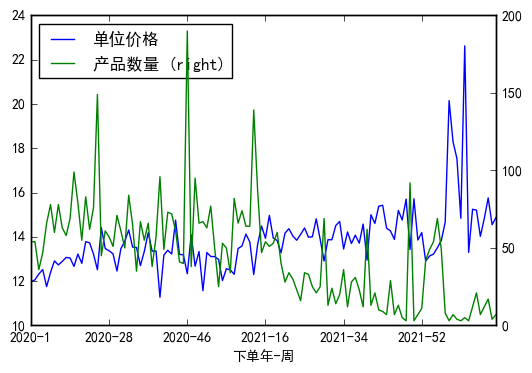

In [83]:
df_top_product_order_list_groupby = df_top_product_order_list.groupby('下单年-周').agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby['单位价格'] = df_top_product_order_list_groupby['订单金额'] / df_top_product_order_list_groupby['产品数量']
df_top_product_order_list_groupby.reset_index().plot(kind='line', x='下单年-周', y=['单位价格', '产品数量'], secondary_y='产品数量')
plt.show()

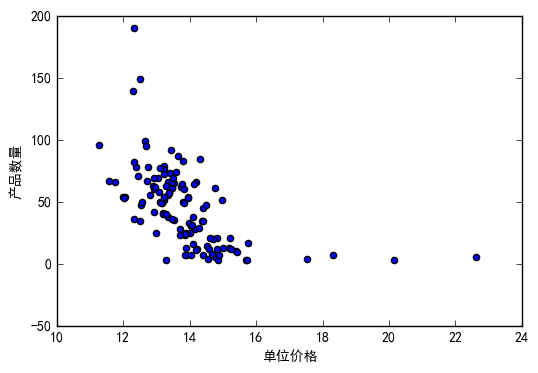

In [84]:
df_top_product_order_list_groupby = df_top_product_order_list.groupby('下单年-周').agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby['单位价格'] = df_top_product_order_list_groupby['订单金额'] / df_top_product_order_list_groupby['产品数量']
df_top_product_order_list_groupby.plot(kind='scatter', x='单位价格', y='产品数量')
plt.show()

In [85]:
df_top_product_order_list_groupby = df_top_product_order_list.groupby('下单年-周').agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby['单位价格'] = df_top_product_order_list_groupby['订单金额'] / df_top_product_order_list_groupby['产品数量']
df_top_product_order_list_groupby[['单位价格', '产品数量']].corr()

,单位价格,产品数量
单位价格,1.000000,-0.564504
产品数量,-0.564504,1.000000


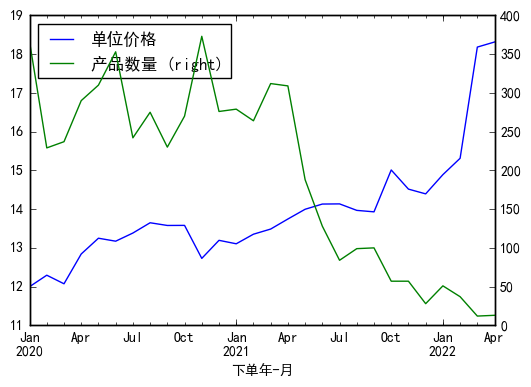

In [86]:
df_top_product_order_list_groupby = df_top_product_order_list.groupby('下单年-月').agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby['单位价格'] = df_top_product_order_list_groupby['订单金额'] / df_top_product_order_list_groupby['产品数量']
df_top_product_order_list_groupby.reset_index().plot(kind='line', x='下单年-月', y=['单位价格', '产品数量'], secondary_y='产品数量')
plt.show()

In [87]:
# 哪些国家对价格更波动更敏感？
df_top_product_order_list_groupby = df_top_product_order_list.groupby(['下单年-周', '中文国家名']).agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby['单位价格'] = df_top_product_order_list_groupby['订单金额'] / df_top_product_order_list_groupby['产品数量']
df_top_product_order_list_groupby_reset_index = df_top_product_order_list_groupby.reset_index()

# 只看头部国家 df_top_country_list
df_top_product_order_list_groupby_country_selected = df_top_product_order_list_groupby_reset_index[df_top_product_order_list_groupby_reset_index['中文国家名'].isin(df_top_country_list)]
# df_top_product_order_list_groupby_country_selected

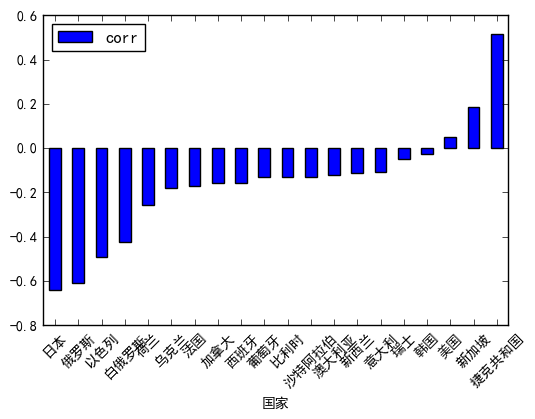

In [88]:
df_country_corr = pd.DataFrame(columns = ['国家', 'corr'])

for country in df_top_country_list:
    df_top_country_corr = df_top_product_order_list_groupby_country_selected[
        df_top_product_order_list_groupby_country_selected['中文国家名'] == country][
        ['单位价格', '产品数量']].corr()['产品数量'][0]
    df_country_corr = df_country_corr.append({'国家' : country, 'corr' : df_top_country_corr}, ignore_index=True)
    
df_country_corr.sort_values(by='corr', ascending=True).plot(kind='bar', x='国家', rot=45)
plt.show()

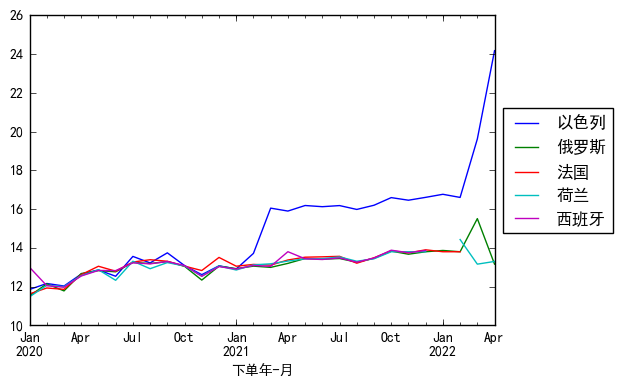

In [89]:
# 上述国家的售价变动
df_top_product_order_list_groupby = df_top_product_order_list[df_top_product_order_list['中文国家名'].isin(df_top_country_list_top_5)].groupby(['中文国家名', '下单年-月']).agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby['单位价格'] = df_top_product_order_list_groupby['订单金额'] / df_top_product_order_list_groupby['产品数量']
df_top_product_order_list_groupby.reset_index().pivot(
    index='下单年-月', columns='中文国家名', values='单位价格').plot().legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [90]:
# 上述国家的销售量，GMV变动
df_top_product_order_list_groupby = df_top_product_order_list[df_top_product_order_list['中文国家名'].isin(df_top_country_list_top_5)].groupby(['中文国家名', '下单年-月']).agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby.reset_index().pivot_table(index='下单年-月',columns='中文国家名', values=['产品数量']).pct_change(1)*100

产品数量                                               
中文国家名           以色列         俄罗斯          法国          荷兰        西班牙
下单年-月                                                             
2020-01         NaN         NaN         NaN         NaN        NaN
2020-02  -42.222222  -49.462366  -60.465116  -43.750000  61.538462
2020-03   -3.846154  -19.148936   17.647059  122.222222  28.571429
2020-04  108.000000  -15.789474   70.000000  -35.000000  14.814815
2020-05  -30.769231   12.500000   82.352941   30.769231   9.677419
2020-06   -5.555556   41.666667  -12.903226   11.764706 -32.352941
2020-07    8.823529  -45.098039  -46.296296  -52.631579  -4.347826
2020-08   -8.108108  -14.285714   24.137931  -11.111111 -27.272727
2020-09   23.529412   50.000000  -13.888889  -37.500000   6.250000
2020-10   54.761905  -19.444444  -32.258065   80.000000  47.058824
2020-11  -16.923077   89.655172  147.619048   22.222222  88.000000
2020-12  -35.185185  -30.909091  -17.307692   18.181818 -25.531915
2021-01   34.285714  -13.157895   11.627907  -46.153846  -8.571429
2021-02   -4.255319  -36.363636   16.666667   85.714286  12.500000
2021-03  -44.444444   57.142857    8.928571   38.461538  -8.333333
2021-04  -20.000000  -39.393939    1.639344   50.000000  45.454545
2021-05  -55.000000  -60.000000  -32.258065  -18.518519 -41.666667
2021-06  133.333333   37.500000  -30.952381  -59.090909 -53.571429
2021-07  -66.666667   45.454545  -62.068966    0.000000  -7.692308
2021-08  185.714286  -37.500000   81.818182    0.000000 -16.666667
2021-09  -30.000000    0.000000  -10.000000   11.111111 -20.000000
2021-10   50.000000  -40.000000  -55.555556  -70.000000 -37.500000
2021-11  -42.857143   83.333333  -12.500000  -66.666667  60.000000
2021-12  -58.333333  -63.636364  -14.285714    0.000000 -62.500000
2022-01  180.000000   50.000000   50.000000         NaN        NaN
2022-02  -21.428571  -83.333333  -88.888889  200.000000 -66.666667
2022-03  -90.909091  100.000000         NaN  -66.666667        NaN
2022-04    0.000000  -50.000000         NaN  200.000000   0.000000

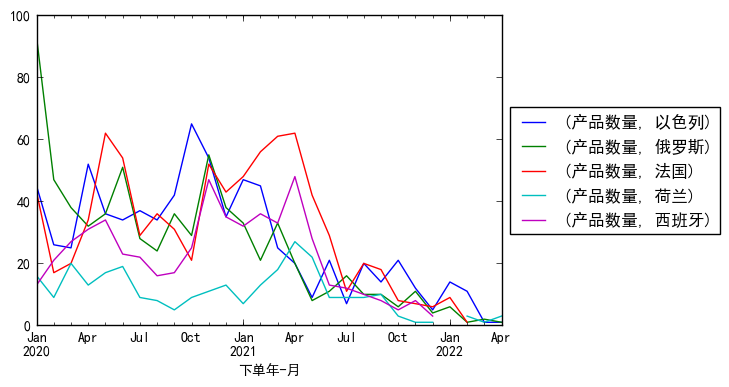

In [91]:
# 上述国家的销售量，GMV变动
df_top_product_order_list_groupby = df_top_product_order_list[df_top_product_order_list['中文国家名'].isin(df_top_country_list_top_5)].groupby(['中文国家名', '下单年-月']).agg({'订单金额': 'sum', '产品数量': 'sum'})
df_top_product_order_list_groupby.reset_index().pivot_table(index='下单年-月',columns='中文国家名', values=['产品数量']).plot().legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Wish投放数据

In [92]:
# 分析Wish的投放数据
df_wish_pay_traffic = pd.read_excel(os.path.join(file_path, '店小秘 - Wish投放数据.xlsx'))
df_wish_pay_traffic.head()

,活动ID,产品ID,活动名称,店铺,币种,预算,费用,总流量,付费流量,订单,成交总额,花费成交比,费用预算比,开始时间,结束时间,活动状态,备选关键词
0,618a6b920970aa7101e04275,"617807835307660e9e4cd1db,",9.9包邮多用电源,Wish店铺,CNY,150.0,0.00,0,0,0,0.00,无,0.0%,2021-11-11,2021-11-25,预设中,"dell laptop charger,hp laptop charger,laptop c..."
1,6187c978d437bd971cf77f33,"6113e3757e828ea8b53155b2,",新多用电源,Wish店铺,CNY,147.0,14.98,8080,0,1,110.08,13.61%,10.19%,2021-11-09,2021-11-23,进行中,"dell laptop charger,hp laptop charger,laptop c..."
2,6183c672a8e7477ab5804aed,"616a3dc50a10c74e78fb0ac2,616a3d07e587578a187ca...",可调电压电源投放,Wish店铺,CNY,400.0,4.85,1792,0,0,0.00,无,1.21%,2021-11-06,2021-11-07,已结束,"adjustable voltage charger,laptop charger,univ..."
3,617acf1e54b9fa10710275ea,"616a3dc50a10c74e78fb0ac2,616a3d07e587578a187ca...",可调电压电源投放,Wish店铺,CNY,400.0,130.06,49819,0,0,0.00,无,32.52%,2021-10-31,2021-11-06,已结束,"adjustable voltage charger,laptop charger,univ..."
4,61793b6a5d485ab42ab61ed4,"616a3acf46fee2dd6661dce3,616a3c8287b2160ff869b...",可调电压电源投放,Wish店铺,CNY,400.0,0.00,0,0,0,0.00,无,0.0%,2021-10-29,2021-11-04,已取消,"adjustable voltage charger,laptop charger,univ..."


In [93]:
df_wish_pay_traffic.count()

活动ID     538
产品ID     538
活动名称     538
店铺       538
币种       154
预算       538
费用       538
总流量      538
付费流量     538
订单       538
成交总额     538
花费成交比    538
费用预算比    538
开始时间     538
结束时间     538
活动状态     538
备选关键词    396
dtype: int64

In [94]:
df_wish_pay_traffic.columns

Index(['活动ID', '产品ID', '活动名称', '店铺', '币种', '预算', '费用', '总流量', '付费流量', '订单',
       '成交总额', '花费成交比', '费用预算比', '开始时间', '结束时间', '活动状态', '备选关键词'],
      dtype='object')

In [95]:
# 币种填充
df_wish_pay_traffic['币种'] = df_wish_pay_traffic['币种'].fillna('USD')

In [96]:
df_wish_pay_traffic.count()

活动ID     538
产品ID     538
活动名称     538
店铺       538
币种       538
预算       538
费用       538
总流量      538
付费流量     538
订单       538
成交总额     538
花费成交比    538
费用预算比    538
开始时间     538
结束时间     538
活动状态     538
备选关键词    396
dtype: int64

In [97]:
df_wish_pay_traffic.groupby(['币种']).count()

,活动ID,产品ID,活动名称,店铺,预算,费用,总流量,付费流量,订单,成交总额,花费成交比,费用预算比,开始时间,结束时间,活动状态,备选关键词
币种,,,,,,,,,,,,,,,,
CNY,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,79
USD,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,317


In [98]:
# 只看CNY的部分
df_wish_pay_traffic_cny_only = df_wish_pay_traffic[df_wish_pay_traffic['币种'] == 'CNY']
df_wish_pay_traffic_cny_only.head()

,活动ID,产品ID,活动名称,店铺,币种,预算,费用,总流量,付费流量,订单,成交总额,花费成交比,费用预算比,开始时间,结束时间,活动状态,备选关键词
0,618a6b920970aa7101e04275,"617807835307660e9e4cd1db,",9.9包邮多用电源,Wish店铺,CNY,150.0,0.00,0,0,0,0.00,无,0.0%,2021-11-11,2021-11-25,预设中,"dell laptop charger,hp laptop charger,laptop c..."
1,6187c978d437bd971cf77f33,"6113e3757e828ea8b53155b2,",新多用电源,Wish店铺,CNY,147.0,14.98,8080,0,1,110.08,13.61%,10.19%,2021-11-09,2021-11-23,进行中,"dell laptop charger,hp laptop charger,laptop c..."
2,6183c672a8e7477ab5804aed,"616a3dc50a10c74e78fb0ac2,616a3d07e587578a187ca...",可调电压电源投放,Wish店铺,CNY,400.0,4.85,1792,0,0,0.00,无,1.21%,2021-11-06,2021-11-07,已结束,"adjustable voltage charger,laptop charger,univ..."
3,617acf1e54b9fa10710275ea,"616a3dc50a10c74e78fb0ac2,616a3d07e587578a187ca...",可调电压电源投放,Wish店铺,CNY,400.0,130.06,49819,0,0,0.00,无,32.52%,2021-10-31,2021-11-06,已结束,"adjustable voltage charger,laptop charger,univ..."
4,61793b6a5d485ab42ab61ed4,"616a3acf46fee2dd6661dce3,616a3c8287b2160ff869b...",可调电压电源投放,Wish店铺,CNY,400.0,0.00,0,0,0,0.00,无,0.0%,2021-10-29,2021-11-04,已取消,"adjustable voltage charger,laptop charger,univ..."


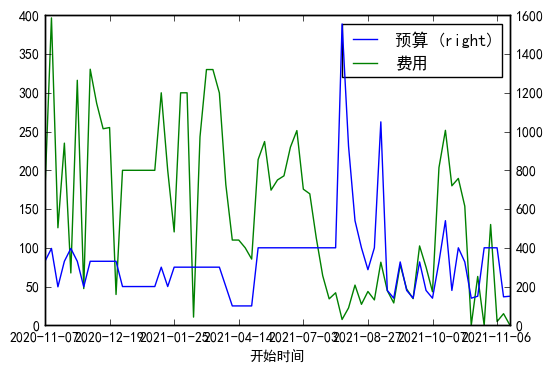

In [99]:
# 日消耗
df_wish_pay_traffic_cny_only.groupby(['开始时间']).agg({'预算': 'sum', '费用': 'sum'}).plot(kind='line', secondary_y='预算')
plt.show()

In [100]:
# 各批次投放总览
df_wish_pay_traffic_cny_only_groupby = df_wish_pay_traffic_cny_only.groupby(['活动名称']).agg({'结束时间': 'max', '预算': 'sum', '费用': 'sum', '成交总额': 'sum', '订单': 'sum', '总流量': 'sum'}).sort_values(by='结束时间', ascending=False)
df_wish_pay_traffic_cny_only_groupby['费用/成交总额'] = round(df_wish_pay_traffic_cny_only_groupby['费用'] / df_wish_pay_traffic_cny_only_groupby['成交总额'],4)*100
df_wish_pay_traffic_cny_only_groupby['总流量/费用'] = round(df_wish_pay_traffic_cny_only_groupby['总流量'] / df_wish_pay_traffic_cny_only_groupby['费用'],0)
df_wish_pay_traffic_cny_only_groupby['费用/预算'] = round(df_wish_pay_traffic_cny_only_groupby['费用'] / df_wish_pay_traffic_cny_only_groupby['预算'],4) * 100

df_wish_pay_traffic_cny_only_groupby

,订单,费用,结束时间,总流量,预算,成交总额,费用/成交总额,总流量/费用,费用/预算
活动名称,,,,,,,,,
9.9包邮多用电源,3,63.00,2021-11-25,25803,300.00,198.40,31.750000,410.0,21.00
新多用电源,29,362.35,2021-11-23,200666,1029.00,3101.62,11.680000,554.0,35.21
可调电压电源投放,3,505.57,2021-11-07,178485,2000.00,353.89,142.860000,353.0,25.28
180w多用电源,7,214.74,2021-11-06,114288,980.00,963.90,22.280000,532.0,21.91
多用电源,482,8068.70,2021-10-27,6120450,14383.28,43898.33,18.380000,759.0,56.10
Type C新电源测试,0,81.41,2021-09-09,29157,1050.00,0.00,inf,358.0,7.75
"Guangzhou Hengji Electronic Co., Ltd_07/26/2021-08/02/2021",4,13.39,2021-08-20,9139,2333.31,379.11,3.530000,683.0,0.57
多用电源组合,49,1264.20,2021-01-23,826534,1593.36,4226.21,29.910000,654.0,79.34
Type C多用电源,2,173.18,2020-11-26,95057,397.04,295.70,58.570000,549.0,43.62


## 速卖通退款分析

In [101]:
# 退款相关
# 先看速卖通
df_dianxiaomi_order_refund_list = df_dianxiaomi_order_list_with_shipping[(df_dianxiaomi_order_list_with_shipping['退款理由'] != '')
                                                          & (df_dianxiaomi_order_list_with_shipping['店铺名称'] == '速卖通店铺')]
# df_dianxiaomi_order_refund_list.head()

In [102]:
df_dianxiaomi_order_refund_list.groupby(['退款理由']).agg({'订单号': 'count'}).sort_values(by='订单号', ascending=False)

,订单号
退款理由,
货物仍然在运输途中,268
运单号无法查询到物流信息,145
产品无法正常工作,113
型号与描述不符,70
破损问题,42
物流退回了包裹,37
平台未返回退款原因,30
尺寸与描述不符,19
海关扣关,19


In [103]:
# top 20国家的退款理由
df_dianxiaomi_order_refund_list[
    df_dianxiaomi_order_refund_list['中文国家名'].isin(df_top_country_list_top_5)
].groupby(['中文国家名','退款理由']).agg({'订单号': 'count'}
                               ).sort_values(by='订单号', ascending=False).reset_index().pivot_table(index='中文国家名',
                                                                                                  columns=['退款理由'],
                                                                                                  values='订单号').reset_index().fillna(0)

退款理由,中文国家名,买家原因下错单,买家原因我不需要,产品无法正常工作,假货,划痕问题,发错地址,型号与描述不符,尺寸与描述不符,平台未返回退款原因,无理由退货,海关扣关,物流方式不一致,物流退回了包裹,破损问题,货物仍然在运输途中,货物短装,运单号无法查询到物流信息
0,以色列,0.0,0.0,4.0,1.0,0.0,2.0,9.0,2.0,1.0,0.0,1.0,0.0,3.0,5.0,56.0,0.0,22.0
1,俄罗斯,0.0,1.0,26.0,0.0,0.0,0.0,12.0,5.0,8.0,1.0,0.0,1.0,7.0,8.0,23.0,0.0,13.0
2,法国,1.0,2.0,13.0,2.0,0.0,4.0,10.0,4.0,4.0,1.0,1.0,0.0,1.0,6.0,16.0,3.0,8.0
3,荷兰,1.0,0.0,8.0,2.0,0.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0
4,西班牙,1.0,3.0,8.0,1.0,1.0,3.0,10.0,1.0,5.0,4.0,1.0,2.0,1.0,3.0,4.0,1.0,8.0


In [104]:
# df_dianxiaomi_order_refund_list.groupby(['退款理由',
#                                          '下单年']).agg({'订单号': 'count'}
#                                                       ).reset_index().sort_values(by=['下单年'],
#                                                                                   ascending=[True]
#                                                                                  ).pivot(
#     index='下单年',
#     columns='退款理由',
#     values='订单号').plot(rot=45, figsize=(20,5)).legend(loc='center left',
#                                       bbox_to_anchor=(1.0, 0.5))
# plt.show()

## 速卖通流量分析

In [105]:
# 速卖通商品流量分析
excel_files = glob.glob(os.path.join(file_path, '2021.10.27 速卖通流量明细', "*.xlsx"))

df_smt_product_traffic_list = []

# loop over the list of csv files
for f in excel_files:
      
    if '【生意参谋】商品排行' in f:
        # read the csv file
        df_smt_product_traffic_xlsx = pd.read_excel(f)

        # print the location and filename
        # print('Location:', f)
        # print('File Name:', f.split("\\")[-1])

        # print the content
        # print('Content:')
        # display(df)
        # print()
        
        # 对英文列进行重命名
        df_smt_product_traffic_xlsx_rename_columns = {
            'Timeframe (USA Time Zone)':'统计时间',
            '类目id':'类目id',
            'Rank':'排名',
            'Taxes':'税费',
            'Product Purchasing Tips':'商品加购人数',
            'Visitors':'访客数',
            'Buyers Paid':'支付买家数',
            'Old Buyer':'支付老买家',
            'Wishlists':'商品收藏人数',
            'Paid Product Number':'支付商品件数',
            'Click rate':'搜索点击率',
            'Page views':'浏览量',
            'Created Orders GMV':'下单金额',
            'GMV':'支付金额',
            'Average visitor duration':'平均停留时长',
            'Old Visitors':'老访客数',
            'New Buyer':'支付新买家',
            'Paid orders':'支付主订单数',
            'New Visitors':'新访客数',
            'Exposure':'搜索曝光量',
            'Orders':'下单主订单数',
            'Order Product Number':'下单商品件数',
            'Created Buyers':'下单买家数',
            'Refund Amount':'成功退款金额',
            'cateLeafName':'根类目名称',
            'cateLeafPathName':'类目路径',
            'Ratio of pageviews to orders':'下单转化率',
            'Conversion Rate':'支付转化率',
            'Revenue per Buyer':'客单价',
            'Payment unit price':'支付件单价',
            'Revenue per visitor':'UV价值'
        }
        df_smt_product_traffic_xlsx.rename(columns=df_smt_product_traffic_xlsx_rename_columns, inplace = True)
        
        df_smt_product_traffic_list.append(df_smt_product_traffic_xlsx)
    
df_smt_product_traffic_merge = pd.concat(df_smt_product_traffic_list)
df_smt_product_traffic_merge.head()

,商品id,统计时间,类目id,排名,税费,商品加购人数,访客数,支付买家数,支付老买家,商品收藏人数,...,下单商品件数,下单买家数,成功退款金额,根类目名称,类目路径,下单转化率,支付转化率,客单价,支付件单价,UV价值
0,32597758635,2020-06-30,0,1,0.0,36,304,8,0,10,...,12,9,11.2,NaN,NaN,0.0296,0.0263,16.89,13.51,44.44
1,33003521931,2020-06-30,0,2,0.0,3,41,0,0,2,...,0,0,0.0,NaN,NaN,0.0000,0.0000,0.00,0.00,0.00
2,32484354951,2020-06-30,0,3,0.0,3,26,1,0,0,...,1,1,0.0,NaN,NaN,0.0385,0.0385,11.25,11.25,43.27
3,4000390794131,2020-06-30,0,4,0.0,4,25,1,0,3,...,1,1,0.0,NaN,NaN,0.0400,0.0400,10.80,10.80,43.20
4,32440656276,2020-06-30,0,5,0.0,1,18,0,0,0,...,0,0,0.0,NaN,NaN,0.0000,0.0000,0.00,0.00,0.00


In [106]:
df_smt_product_traffic_merge.columns

Index(['商品id', '统计时间', '类目id', '排名', '税费', '商品加购人数', '访客数', '支付买家数', '支付老买家',
       '商品收藏人数', '支付商品件数', '搜索点击率', '浏览量', '下单金额', '支付金额', '平均停留时长', '老访客数',
       '支付新买家', '支付主订单数', '新访客数', '搜索曝光量', '下单主订单数', '下单商品件数', '下单买家数',
       '成功退款金额', '根类目名称', '类目路径', '下单转化率', '支付转化率', '客单价', '支付件单价', 'UV价值'],
      dtype='object')

In [107]:
# 聚合速卖通商品表
df_smt_selling_list_dianyuan = pd.read_excel(os.path.join(file_path, '速卖通产品列表（从速卖通后台导出）.xlsx'), sheetname='笔记本电源适配器', skiprows=1)
df_smt_selling_list_shouji = pd.read_excel(os.path.join(file_path, '速卖通产品列表（从速卖通后台导出）.xlsx'), sheetname='手机充电器', skiprows=1)
df_smt_selling_list_jietou = pd.read_excel(os.path.join(file_path, '速卖通产品列表（从速卖通后台导出）.xlsx'), sheetname='电脑硬件线缆接头', skiprows=1)

df_smt_selling_list = pd.concat([df_smt_selling_list_dianyuan, df_smt_selling_list_shouji, df_smt_selling_list_jietou])

df_smt_selling_list.head(1)

,*产地,*发货期,*品牌,*商品图片1,*商品标题,*是否氮化镓充电器,*最大输出功率,*最小计量单元,*服务模板,*物流尺寸-宽(cm),...,商品图片6,型号,库存扣减方式,插头类型,是否支持智能充电(充完智能断电),是否有包装,是否有显示屏,每包,类型,适用品牌
0,中国(Origin),3,liangpw,https://ae04.alicdn.com/kf/HTB1VgQBKVXXXXc8XFX...,19V 1.75A 33W AC Laptop Power Adapter Charger ...,NaN,NaN,件/个 (piece/pieces),新手服务模板,13,...,https://ae04.alicdn.com/kf/HTB1zvkKKVXXXXc0XpX...,19V 1.75A 33W,付款减库存,Other,NaN,有,NaN,1,NaN,供华硕


In [108]:
df_smt_selling_list.columns

Index(['*产地', '*发货期', '*品牌', '*商品图片1', '*商品标题', '*是否氮化镓充电器', '*最大输出功率',
       '*最小计量单元', '*服务模板', '*物流尺寸-宽(cm)', '*物流尺寸-长(cm)', '*物流尺寸-高(cm)',
       '*物流重量', '*类型', '*认证', '*质量认证', '*输出接口', '*输出电压', '*输出电流', '*运费模板',
       '*采用快速充电的协议', '*销售方式', 'Direction', 'catId', 'id', 'originalLocalName',
       'sellerId', '产品状态', '关联欧盟责任人', '功率来源', '商品图片2', '商品图片3', '商品图片4',
       '商品图片5', '商品图片6', '型号', '库存扣减方式', '插头类型', '是否支持智能充电(充完智能断电)', '是否有包装',
       '是否有显示屏', '每包', '类型', '适用品牌'],
      dtype='object')

In [109]:
# sku粒度，各项指标
# 选取近90天指标
from datetime import date, datetime, timedelta

# start_date = '2021-09-01'
# end_date = '2021-09-30'

d_1 = date.today() - timedelta(days=30)
d_90 = date.today() - timedelta(days=120)

start_date = d_90.strftime("%Y-%m-%d")
end_date = d_1.strftime("%Y-%m-%d")

df_smt_product_traffic_merge_d90 = df_smt_product_traffic_merge[
    (df_smt_product_traffic_merge['统计时间'] >= start_date) 
    & (df_smt_product_traffic_merge['统计时间'] < end_date)
]
df_smt_product_traffic_merge_d90.head()

,商品id,统计时间,类目id,排名,税费,商品加购人数,访客数,支付买家数,支付老买家,商品收藏人数,...,下单商品件数,下单买家数,成功退款金额,根类目名称,类目路径,下单转化率,支付转化率,客单价,支付件单价,UV价值
0,32597758635,2022-01-31,14191109,1,9.07,7,34,3,0,2,...,3,3,0.0,Laptop Adapter,Computer & Office->Laptop Parts & Accessories-...,0.0882,0.0882,16.87,16.87,148.85
1,1005003130966569,2022-01-31,14191109,2,0.00,1,10,0,0,1,...,0,0,0.0,Laptop Adapter,Computer & Office->Laptop Parts & Accessories-...,0.0000,0.0000,0.00,0.00,0.00
2,33003521931,2022-01-31,14191109,3,0.00,0,9,0,0,0,...,0,0,0.0,Laptop Adapter,Computer & Office->Laptop Parts & Accessories-...,0.0000,0.0000,0.00,0.00,0.00
3,4000390794131,2022-01-31,14191109,4,0.00,1,7,0,0,0,...,0,0,0.0,Laptop Adapter,Computer & Office->Laptop Parts & Accessories-...,0.0000,0.0000,0.00,0.00,0.00
4,1005003464405390,2022-01-31,14191109,5,3.82,1,7,1,0,0,...,2,1,0.0,Laptop Adapter,Computer & Office->Laptop Parts & Accessories-...,0.1429,0.1429,22.58,11.29,322.57


In [110]:
# df_smt_product_traffic_merge_d90['统计时间'].max()

In [111]:
df_smt_product_traffic_merge_d90_groupby = df_smt_product_traffic_merge_d90.groupby(['商品id']).agg({
    '搜索曝光量': 'sum',
    '浏览量': 'sum',
    '访客数': 'sum',
    '商品加购人数': 'sum',
    '商品收藏人数': 'sum',
    '支付金额': 'sum'
})

df_smt_product_traffic_merge_d90_groupby.head(1)

,搜索曝光量,商品加购人数,商品收藏人数,浏览量,支付金额,访客数
商品id,,,,,,
32291638714,22,1,0,11,0.0,10


In [112]:
# 两表merge
df_smt_selling_list_merge = pd.merge(df_smt_selling_list,
                                     df_smt_product_traffic_merge_d90_groupby.reset_index(),
                                     how='left',
                                     left_on='id',
                                     right_on='商品id'
                                    )
df_smt_selling_list_merge.head(1)

,*产地,*发货期,*品牌,*商品图片1,*商品标题,*是否氮化镓充电器,*最大输出功率,*最小计量单元,*服务模板,*物流尺寸-宽(cm),...,每包,类型,适用品牌,商品id,搜索曝光量,商品加购人数,商品收藏人数,浏览量,支付金额,访客数
0,中国(Origin),3,liangpw,https://ae04.alicdn.com/kf/HTB1VgQBKVXXXXc8XFX...,19V 1.75A 33W AC Laptop Power Adapter Charger ...,NaN,NaN,件/个 (piece/pieces),新手服务模板,13,...,1,NaN,供华硕,3.257296e+10,19.0,0.0,0.0,18.0,0.0,13.0


In [113]:
# 加维度
df_smt_selling_list_merge['近90天有动销'] = df_smt_selling_list_merge['支付金额']>0
df_smt_selling_list_merge['近90天有曝光'] = df_smt_selling_list_merge['搜索曝光量']>0
df_smt_selling_list_merge['近90天有流量'] = df_smt_selling_list_merge['访客数']>0

df_smt_selling_list_merge.head(1)

,*产地,*发货期,*品牌,*商品图片1,*商品标题,*是否氮化镓充电器,*最大输出功率,*最小计量单元,*服务模板,*物流尺寸-宽(cm),...,商品id,搜索曝光量,商品加购人数,商品收藏人数,浏览量,支付金额,访客数,近90天有动销,近90天有曝光,近90天有流量
0,中国(Origin),3,liangpw,https://ae04.alicdn.com/kf/HTB1VgQBKVXXXXc8XFX...,19V 1.75A 33W AC Laptop Power Adapter Charger ...,NaN,NaN,件/个 (piece/pieces),新手服务模板,13,...,3.257296e+10,19.0,0.0,0.0,18.0,0.0,13.0,False,True,True


In [114]:
# 近90天有动销
df_smt_selling_list_merge.groupby(['近90天有动销']).agg({
    '商品id': 'count'
})

,商品id
近90天有动销,
False,129
True,20


In [115]:
# 近90天有曝光
df_smt_selling_list_merge.groupby(['近90天有曝光']).agg({
    '商品id': 'count'
})

,商品id
近90天有曝光,
False,10
True,139


In [116]:
# 近90天有流量
df_smt_selling_list_merge.groupby(['近90天有流量']).agg({
    '商品id': 'count'
})

,商品id
近90天有流量,
False,0
True,149


In [117]:
# 近90天搜索曝光量top 10商品id
df_smt_selling_list_merge_top_impression = list(df_smt_selling_list_merge.sort_values(by=['搜索曝光量'], ascending=False)['id'].head(10))
df_smt_selling_list_merge_top_impression

[32597758635,
 4000390794131,
 33003521931,
 4001363780777,
 1005003464405390,
 1005003130966569,
 1005003168695306,
 1005003132169593,
 32743835649,
 1005003253147998]

In [118]:
# 近90天搜索曝光量top 10商品id的90天表现
d_1 = date.today() - timedelta(days=1)
d_180 = date.today() - timedelta(days=90)

start_date = d_180.strftime("%Y-%m-%d")
end_date = d_1.strftime("%Y-%m-%d")

df_smt_product_traffic_merge_d180 = df_smt_product_traffic_merge[
    (df_smt_product_traffic_merge['统计时间'] >= start_date) 
    & (df_smt_product_traffic_merge['统计时间'] < end_date)
]
# df_smt_product_traffic_merge_d90.head()

df_smt_product_traffic_merge_d180_selected = df_smt_product_traffic_merge_d180[df_smt_product_traffic_merge_d180['商品id'].isin(df_smt_selling_list_merge_top_impression)]
df_smt_product_traffic_merge_d180_selected.head(1)

,商品id,统计时间,类目id,排名,税费,商品加购人数,访客数,支付买家数,支付老买家,商品收藏人数,...,下单商品件数,下单买家数,成功退款金额,根类目名称,类目路径,下单转化率,支付转化率,客单价,支付件单价,UV价值
0,32597758635,2022-01-31,14191109,1,9.07,7,34,3,0,2,...,3,3,0.0,Laptop Adapter,Computer & Office->Laptop Parts & Accessories-...,0.0882,0.0882,16.87,16.87,148.85


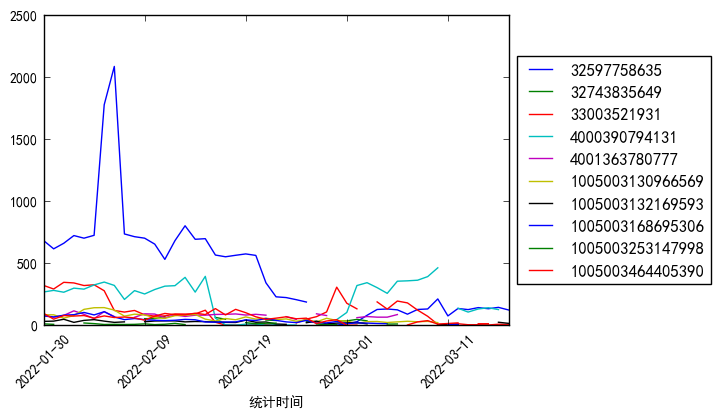

In [119]:
df_smt_product_traffic_merge_d180_selected.pivot(index='统计时间',
                                                columns='商品id',
                                                values='搜索曝光量').plot(rot=45).legend(loc='center left',
                                                                                    bbox_to_anchor=(1.0, 0.5))
plt.show()

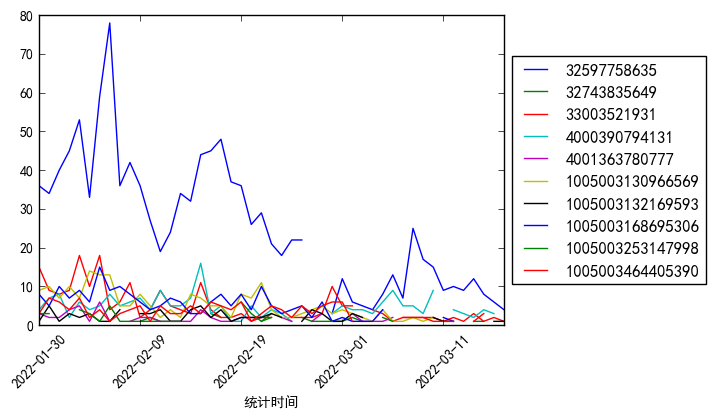

In [120]:
df_smt_product_traffic_merge_d180_selected.pivot(index='统计时间',
                                                columns='商品id',
                                                values='访客数').plot(rot=45).legend(loc='center left',
                                                                                    bbox_to_anchor=(1.0, 0.5))
plt.show()

In [121]:
df_smt_selling_list_merge.to_csv(os.path.join(file_path, '速卖通商品表现.csv'))

In [122]:
df_smt_selling_list_merge.head(1)

,*产地,*发货期,*品牌,*商品图片1,*商品标题,*是否氮化镓充电器,*最大输出功率,*最小计量单元,*服务模板,*物流尺寸-宽(cm),...,商品id,搜索曝光量,商品加购人数,商品收藏人数,浏览量,支付金额,访客数,近90天有动销,近90天有曝光,近90天有流量
0,中国(Origin),3,liangpw,https://ae04.alicdn.com/kf/HTB1VgQBKVXXXXc8XFX...,19V 1.75A 33W AC Laptop Power Adapter Charger ...,NaN,NaN,件/个 (piece/pieces),新手服务模板,13,...,3.257296e+10,19.0,0.0,0.0,18.0,0.0,13.0,False,True,True


In [123]:
df_smt_selling_list_merge.columns

Index(['*产地', '*发货期', '*品牌', '*商品图片1', '*商品标题', '*是否氮化镓充电器', '*最大输出功率',
       '*最小计量单元', '*服务模板', '*物流尺寸-宽(cm)', '*物流尺寸-长(cm)', '*物流尺寸-高(cm)',
       '*物流重量', '*类型', '*认证', '*质量认证', '*输出接口', '*输出电压', '*输出电流', '*运费模板',
       '*采用快速充电的协议', '*销售方式', 'Direction', 'catId', 'id', 'originalLocalName',
       'sellerId', '产品状态', '关联欧盟责任人', '功率来源', '商品图片2', '商品图片3', '商品图片4',
       '商品图片5', '商品图片6', '型号', '库存扣减方式', '插头类型', '是否支持智能充电(充完智能断电)', '是否有包装',
       '是否有显示屏', '每包', '类型', '适用品牌', '商品id', '搜索曝光量', '商品加购人数', '商品收藏人数',
       '浏览量', '支付金额', '访客数', '近90天有动销', '近90天有曝光', '近90天有流量'],
      dtype='object')

In [124]:
# 聚合速卖通商品表&价格
df_smt_selling_variation_list_dianyuan = pd.read_excel(os.path.join(file_path, '速卖通产品价格列表（从速卖通后台导出）.xlsx'), sheetname='笔记本电源适配器', skiprows=1)
df_smt_selling_variation_list_shouji = pd.read_excel(os.path.join(file_path, '速卖通产品价格列表（从速卖通后台导出）.xlsx'), sheetname='手机充电器', skiprows=1)
df_smt_selling_variation_list_jietou = pd.read_excel(os.path.join(file_path, '速卖通产品价格列表（从速卖通后台导出）.xlsx'), sheetname='电脑硬件线缆接头', skiprows=1)

df_smt_selling_variation_list = pd.concat([df_smt_selling_variation_list_dianyuan, df_smt_selling_variation_list_shouji, df_smt_selling_variation_list_jietou])

df_smt_selling_variation_list.head(1)

,*商品标题,*商家仓库存,*零售价(USD),Australia,Belarus,Belgium,Brazil,Canada,Chile,Colombia,...,sellerId,skuId,发货地,商品编码,属性对,属性对.1,插头标准,线缆长度,调价方式,颜色
0,19V 1.75A 33W AC Laptop Power Adapter Charger ...,1000,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202623695,12000027679687652,中国,NaN,NaN,NaN,NaN,NaN,absolute,白色


In [125]:
df_smt_selling_variation_list.columns

Index(['*商品标题', '*商家仓库存', '*零售价(USD)', 'Australia', 'Belarus', 'Belgium',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'France', 'Germany',
       'Indonesia', 'Israel', 'Italy', 'Japan', 'Malaysia', 'Netherlands',
       'Philippines', 'Poland', 'Portugal', 'Russian Federation',
       'Saudi Arabia', 'Singapore', 'South Korea', 'Spain', 'Thailand',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vietnam', 'catId', 'currencyCode', 'id',
       'originalLocalName', 'sellerId', 'skuId', '发货地', '商品编码', '属性对', '属性对.1',
       '插头标准', '线缆长度', '调价方式', '颜色'],
      dtype='object')

In [126]:
# join 商品表
df_smt_selling_variation_list_merge = pd.merge(df_smt_selling_variation_list[['id', 'skuId', '颜色', '*零售价(USD)']],
                                               df_smt_selling_list_merge, how='left', left_on='id', right_on='id')
df_smt_selling_variation_list_merge.head(1)

,id,skuId,颜色,*零售价(USD),*产地,*发货期,*品牌,*商品图片1,*商品标题,*是否氮化镓充电器,...,商品id,搜索曝光量,商品加购人数,商品收藏人数,浏览量,支付金额,访客数,近90天有动销,近90天有曝光,近90天有流量
0,32572961264,12000027679687652,白色,15.0,中国(Origin),3,liangpw,https://ae04.alicdn.com/kf/HTB1VgQBKVXXXXc8XFX...,19V 1.75A 33W AC Laptop Power Adapter Charger ...,NaN,...,3.257296e+10,19.0,0.0,0.0,18.0,0.0,13.0,False,True,True


In [127]:
df_smt_selling_variation_list_merge.columns

Index(['id', 'skuId', '颜色', '*零售价(USD)', '*产地', '*发货期', '*品牌', '*商品图片1',
       '*商品标题', '*是否氮化镓充电器', '*最大输出功率', '*最小计量单元', '*服务模板', '*物流尺寸-宽(cm)',
       '*物流尺寸-长(cm)', '*物流尺寸-高(cm)', '*物流重量', '*类型', '*认证', '*质量认证', '*输出接口',
       '*输出电压', '*输出电流', '*运费模板', '*采用快速充电的协议', '*销售方式', 'Direction', 'catId',
       'originalLocalName', 'sellerId', '产品状态', '关联欧盟责任人', '功率来源', '商品图片2',
       '商品图片3', '商品图片4', '商品图片5', '商品图片6', '型号', '库存扣减方式', '插头类型',
       '是否支持智能充电(充完智能断电)', '是否有包装', '是否有显示屏', '每包', '类型', '适用品牌', '商品id',
       '搜索曝光量', '商品加购人数', '商品收藏人数', '浏览量', '支付金额', '访客数', '近90天有动销', '近90天有曝光',
       '近90天有流量'],
      dtype='object')

In [128]:
sorted_columns = ['id', 'skuId', '*商品标题', '*零售价(USD)', '颜色', '*商品图片1', '商品图片2',
                  '商品图片3', '商品图片4', '商品图片5', '商品图片6']

In [129]:
df_smt_selling_variation_list_merge_for_output = df_smt_selling_variation_list_merge[sorted_columns].sort_values(by=['id', '*零售价(USD)'], ascending=[True, True])
df_smt_selling_variation_list_merge_for_output.head(1)

,id,skuId,*商品标题,*零售价(USD),颜色,*商品图片1,商品图片2,商品图片3,商品图片4,商品图片5,商品图片6
513,32291638714,12000027680913793,19V 4.74A Ac Laptop Power Adapter Charger For ...,10.0,白色,https://ae04.alicdn.com/kf/S1f886aed88764e68a7...,https://ae04.alicdn.com/kf/Sd5c30ba8fe8c4659b5...,https://ae04.alicdn.com/kf/Sf49bb7c344c440d199...,https://ae04.alicdn.com/kf/S12a732f6be804fb483...,https://ae04.alicdn.com/kf/S7457cc4462504a8892...,https://ae04.alicdn.com/kf/S827ce6ad03814523a0...


In [130]:
# 取每个product的最低价；最低价 = 只含电源的价格
# rank = 1 只含电源；rank = 2/3/4/5 依次指代us/uk/eu/au plug
df_smt_selling_variation_list_merge_for_output["rank"] = df_smt_selling_variation_list_merge_for_output.groupby("id")["*零售价(USD)"].rank(method='first', ascending=True)
df_smt_selling_variation_list_merge_for_output.head(1)

,id,skuId,*商品标题,*零售价(USD),颜色,*商品图片1,商品图片2,商品图片3,商品图片4,商品图片5,商品图片6,rank
513,32291638714,12000027680913793,19V 4.74A Ac Laptop Power Adapter Charger For ...,10.0,白色,https://ae04.alicdn.com/kf/S1f886aed88764e68a7...,https://ae04.alicdn.com/kf/Sd5c30ba8fe8c4659b5...,https://ae04.alicdn.com/kf/Sf49bb7c344c440d199...,https://ae04.alicdn.com/kf/S12a732f6be804fb483...,https://ae04.alicdn.com/kf/S7457cc4462504a8892...,https://ae04.alicdn.com/kf/S827ce6ad03814523a0...,1.0


In [131]:
# 更换plug type

df_smt_selling_variation_list_merge_for_output['type'] = np.select(
    [
        df_smt_selling_variation_list_merge_for_output['rank'] == 1,
        df_smt_selling_variation_list_merge_for_output['rank'] == 2,
        df_smt_selling_variation_list_merge_for_output['rank'] == 3,
        df_smt_selling_variation_list_merge_for_output['rank'] == 4,
        df_smt_selling_variation_list_merge_for_output['rank'] == 5
    ], 
    [
        'Only Adapter', 
        'US Plug',
        'UK Plug',
        'EU Plug',
        'AU Plug'
    ], 
    default='Unknown'
)

df_smt_selling_variation_list_merge_for_output.head(5)

,id,skuId,*商品标题,*零售价(USD),颜色,*商品图片1,商品图片2,商品图片3,商品图片4,商品图片5,商品图片6,rank,type
513,32291638714,12000027680913793,19V 4.74A Ac Laptop Power Adapter Charger For ...,10.0,白色,https://ae04.alicdn.com/kf/S1f886aed88764e68a7...,https://ae04.alicdn.com/kf/Sd5c30ba8fe8c4659b5...,https://ae04.alicdn.com/kf/Sf49bb7c344c440d199...,https://ae04.alicdn.com/kf/S12a732f6be804fb483...,https://ae04.alicdn.com/kf/S7457cc4462504a8892...,https://ae04.alicdn.com/kf/S827ce6ad03814523a0...,1.0,Only Adapter
514,32291638714,12000027680913794,19V 4.74A Ac Laptop Power Adapter Charger For ...,15.0,橙色,https://ae04.alicdn.com/kf/S1f886aed88764e68a7...,https://ae04.alicdn.com/kf/Sd5c30ba8fe8c4659b5...,https://ae04.alicdn.com/kf/Sf49bb7c344c440d199...,https://ae04.alicdn.com/kf/S12a732f6be804fb483...,https://ae04.alicdn.com/kf/S7457cc4462504a8892...,https://ae04.alicdn.com/kf/S827ce6ad03814523a0...,2.0,US Plug
515,32291638714,12000027680913795,19V 4.74A Ac Laptop Power Adapter Charger For ...,15.0,红色,https://ae04.alicdn.com/kf/S1f886aed88764e68a7...,https://ae04.alicdn.com/kf/Sd5c30ba8fe8c4659b5...,https://ae04.alicdn.com/kf/Sf49bb7c344c440d199...,https://ae04.alicdn.com/kf/S12a732f6be804fb483...,https://ae04.alicdn.com/kf/S7457cc4462504a8892...,https://ae04.alicdn.com/kf/S827ce6ad03814523a0...,3.0,UK Plug
516,32291638714,12000027680913796,19V 4.74A Ac Laptop Power Adapter Charger For ...,15.0,黄色,https://ae04.alicdn.com/kf/S1f886aed88764e68a7...,https://ae04.alicdn.com/kf/Sd5c30ba8fe8c4659b5...,https://ae04.alicdn.com/kf/Sf49bb7c344c440d199...,https://ae04.alicdn.com/kf/S12a732f6be804fb483...,https://ae04.alicdn.com/kf/S7457cc4462504a8892...,https://ae04.alicdn.com/kf/S827ce6ad03814523a0...,4.0,EU Plug
517,32291638714,12000027680913797,19V 4.74A Ac Laptop Power Adapter Charger For ...,15.0,紫色,https://ae04.alicdn.com/kf/S1f886aed88764e68a7...,https://ae04.alicdn.com/kf/Sd5c30ba8fe8c4659b5...,https://ae04.alicdn.com/kf/Sf49bb7c344c440d199...,https://ae04.alicdn.com/kf/S12a732f6be804fb483...,https://ae04.alicdn.com/kf/S7457cc4462504a8892...,https://ae04.alicdn.com/kf/S827ce6ad03814523a0...,5.0,AU Plug


In [132]:
# 选取product_id导出
product_id_list = [
    '1005004056743218',
    '1005003168695306',
    '1005003213969648',
    '1005003965719158'
]

In [133]:
# 导出

# 更换字段类型
df_smt_selling_variation_list_merge_for_output['id'] = df_smt_selling_variation_list_merge_for_output['id'].astype('str')
df_smt_selling_variation_list_merge_for_output['skuId'] = df_smt_selling_variation_list_merge_for_output['skuId'].astype('str')

df_smt_selling_variation_list_merge_for_output[
    df_smt_selling_variation_list_merge_for_output['id'].isin(product_id_list)
].to_excel(os.path.join(file_path, '速卖通往Wish同步商品名单.xlsx'))

In [134]:
# 只看爆款
# selected_product_id = 1005003130966569
selected_product_id = 32597758635
df_smt_product_traffic_merge_selected = df_smt_product_traffic_merge[df_smt_product_traffic_merge['商品id'] == selected_product_id]
df_smt_product_traffic_merge_selected.head()

,商品id,统计时间,类目id,排名,税费,商品加购人数,访客数,支付买家数,支付老买家,商品收藏人数,...,下单商品件数,下单买家数,成功退款金额,根类目名称,类目路径,下单转化率,支付转化率,客单价,支付件单价,UV价值
0,32597758635,2020-06-30,0,1,0.0,36,304,8,0,10,...,12,9,11.20,NaN,NaN,0.0296,0.0263,16.89,13.51,44.44
59,32597758635,2020-06-29,0,1,0.0,27,281,11,0,8,...,11,11,38.40,NaN,NaN,0.0391,0.0391,13.25,13.25,51.89
125,32597758635,2020-06-28,0,1,0.0,30,285,5,2,18,...,7,5,25.76,NaN,NaN,0.0175,0.0175,19.85,14.18,34.82
170,32597758635,2020-06-27,0,1,0.0,17,199,4,0,3,...,6,6,0.00,NaN,NaN,0.0302,0.0201,13.20,13.20,26.53
236,32597758635,2020-06-26,0,1,0.0,22,172,3,0,12,...,3,3,0.00,NaN,NaN,0.0174,0.0174,13.27,13.27,23.14


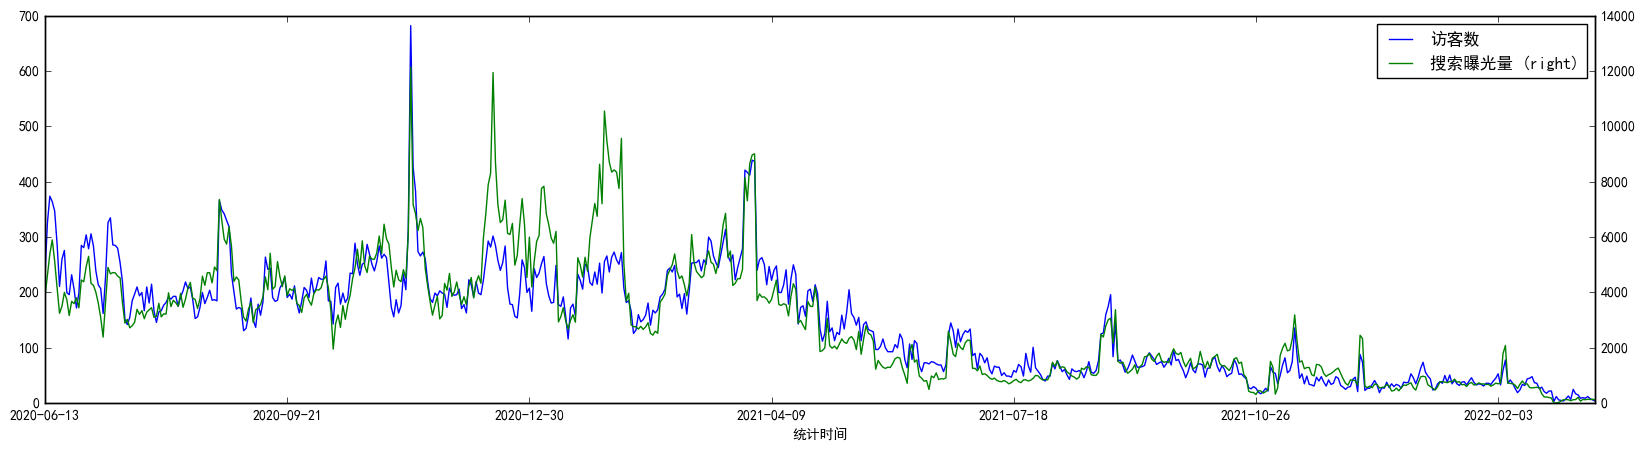

In [135]:
df_smt_product_traffic_merge_selected.sort_values(by='统计时间', 
                                                  ascending=True).plot(kind='line',
                                                                       x='统计时间',
                                                                       y=['访客数',
                                                                          '搜索曝光量'],
                                                                       secondary_y='搜索曝光量',
                                                                       figsize=(20,5)
                                                                      )
plt.show()

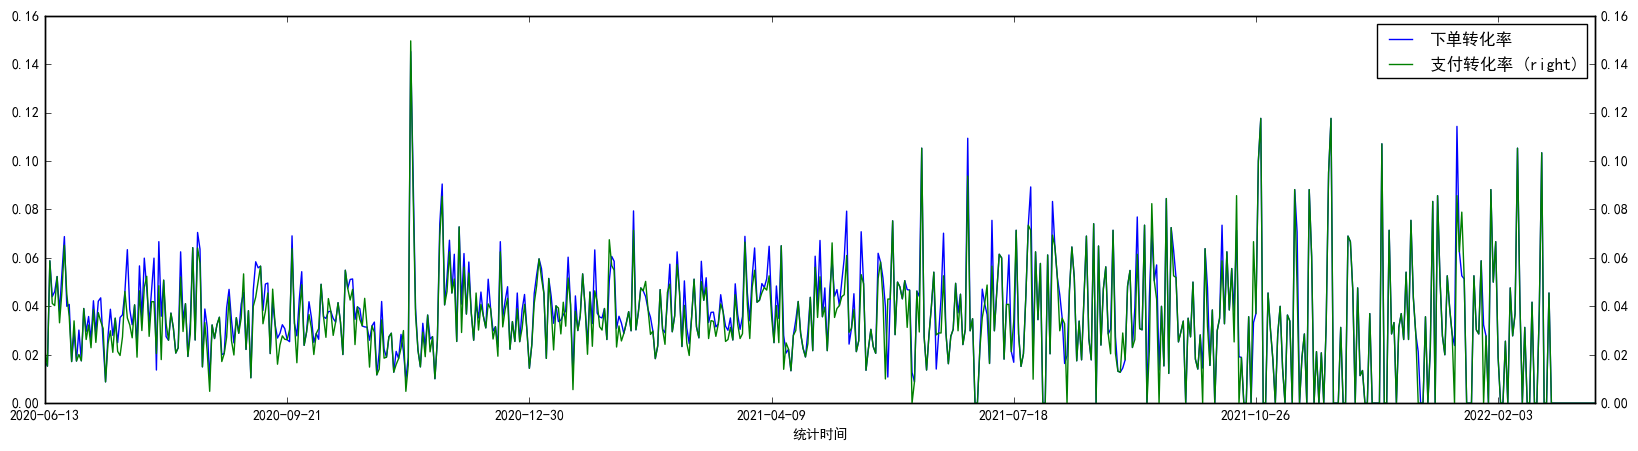

In [136]:
df_smt_product_traffic_merge_selected.sort_values(by='统计时间', 
                                                  ascending=True).plot(kind='line',
                                                                       x='统计时间',
                                                                       y=['下单转化率',
                                                                          '支付转化率'],
                                                                       secondary_y='支付转化率',
                                                                       figsize=(20,5)
                                                                      )
plt.show()

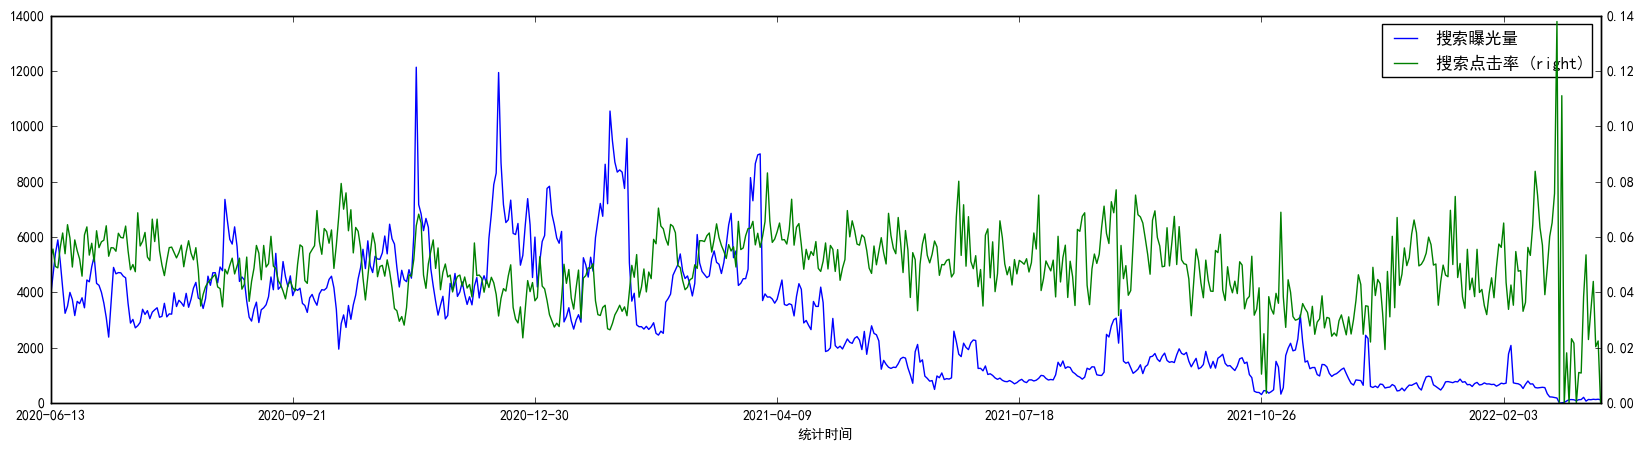

In [137]:
df_smt_product_traffic_merge_selected.sort_values(by='统计时间', 
                                                  ascending=True).plot(kind='line',
                                                                       x='统计时间',
                                                                       y=['搜索曝光量',
                                                                          '搜索点击率'],
                                                                       secondary_y='搜索点击率',
                                                                       figsize=(20,5)
                                                                      )
plt.show()

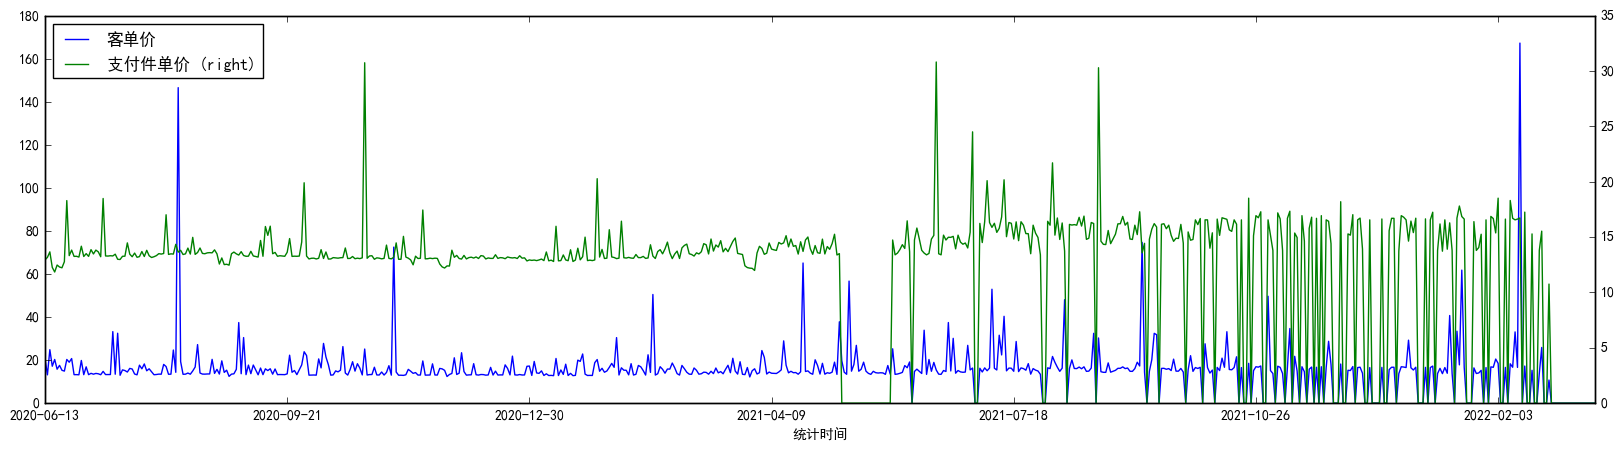

In [138]:
df_smt_product_traffic_merge_selected.sort_values(by='统计时间', 
                                                  ascending=True).plot(kind='line',
                                                                       x='统计时间',
                                                                       y=['客单价',
                                                                          '支付件单价'],
                                                                       secondary_y='支付件单价',
                                                                       figsize=(20,5)
                                                                      )
plt.show()

## 电源店对账

### 速卖通

In [139]:
excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.xlsx"))

df_smt_billing_list = []

# loop over the list of csv files
for f in excel_files:
    if '【速卖通】' in f:
        df_smt_billing_xlsx = pd.read_excel(f)
        df_smt_billing_list.append(df_smt_billing_xlsx)
    
df_smt_billing_merge = pd.concat(df_smt_billing_list)
df_smt_billing_merge.head()

,订单号,商品总额,放款金额,退款总额,平台佣金扣款,联盟佣金扣款,平台佣金退款,联盟佣金退款,商品ID,商品编码,商品数量,下单时间,付款时间,发货时间,商品名称
0,8016212023238582,US $4.20,US $4.20,NaN,US $0.21,US $0.25,NaN,NaN,32602982934,NaN,1.0,2020-06-29 22:39,2020-06-29 22:39,2020-06-29 23:24,19V 3.42A 65W Universal Power Adapter Charger ...
1,8016212023238582,US $9.81,US $9.81,NaN,US $0.49,NaN,NaN,NaN,32602982934,NaN,NaN,2020-06-29 22:39,2020-06-29 22:39,2020-06-29 23:24,LOGISTIC
2,8016250034695930,US $10.80,US $10.80,NaN,US $0.54,US $0.54,NaN,NaN,4000390794131,NaN,1.0,2020-06-29 20:10,2020-06-29 20:11,2020-06-29 22:45,19V 4.74A 90W Universal Laptop Charger Adapter...
3,3004613294236074,US $13.20,US $13.20,NaN,US $0.66,NaN,NaN,NaN,32597758635,NaN,1.0,2020-06-29 16:43,2020-06-29 16:44,2020-06-29 22:51,19V 4.74A 90W Universal Power Adapter Charger ...
4,8016261588162921,US $11.27,US $11.27,NaN,US $0.56,US $0.68,NaN,NaN,32298664354,NaN,1.0,2020-06-29 15:15,2020-06-29 15:15,2020-06-29 22:46,22.5V 1.25A 30W Power Adapter Charger For IRob...


### 亚马逊

In [140]:
excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.csv"))

df_amz_billing_list = []

# loop over the list of csv files
for f in excel_files:
    if '亚马逊' in f:
        df_amz_billing_csv = pd.read_csv(f)
        df_amz_billing_list.append(df_amz_billing_csv)
    
df_amz_billing_merge = pd.concat(df_amz_billing_list)

df_amz_billing_merge['下单年-月'] = pd.to_datetime(df_amz_billing_merge.iloc[: , -1]).dt.to_period('M')

df_amz_billing_merge.head()

,亚马逊所收费用,交易类型,促销返点总额,其他,商品价格总额,商品详情,总计 (AUD),总计 (CAD),总计 (EUR),总计 (GBP),总计 (MXN),总计 (SEK),总计 (TRY),总计 (USD),订单编号,"﻿""日期""",下单年-月
0,-2.40,订单付款,0.0,0.0,16.0,19V 4.74A 90W AC Power Adapter Charger f...,NaN,13.60,NaN,NaN,NaN,NaN,NaN,NaN,701-0906551-9490601,2021/11/10,2021-11
1,-2.33,订单付款,0.0,0.0,15.5,19V 3.42A 65W Laptop Ac Power Adapter Ch...,NaN,13.17,NaN,NaN,NaN,NaN,NaN,NaN,701-9336811-5612242,2021/11/5,2021-11
2,-2.08,服务费用,0.0,0.0,0.0,广告费用,NaN,-2.08,NaN,NaN,NaN,NaN,NaN,NaN,---,2021/11/2,2021-11
3,-2.76,订单付款,0.0,0.0,18.4,12V 3.6A Power Adapter Charger for Micro...,NaN,15.64,NaN,NaN,NaN,NaN,NaN,NaN,702-9790257-1510605,2021/11/1,2021-11
4,2.70,退款,0.0,0.0,-22.5,10.5V 3.8A to 10.5V 4.3A Travel Power Ad...,NaN,-19.80,NaN,NaN,NaN,NaN,NaN,NaN,701-7158111-2867451,2021/10/28,2021-10


In [141]:
df_amz_billing_merge.columns

Index(['亚马逊所收费用', '交易类型', '促销返点总额', '其他', '商品价格总额', '商品详情', '总计 (AUD)',
       '总计 (CAD)', '总计 (EUR)', '总计 (GBP)', '总计 (MXN)', '总计 (SEK)', '总计 (TRY)',
       '总计 (USD)', '订单编号', '﻿"日期"', '下单年-月'],
      dtype='object')

In [142]:
# 每月收入
df_amz_billing_merge.groupby(['下单年-月']).agg({'总计 (AUD)': 'sum',
                                             '总计 (CAD)': 'sum',
                                             '总计 (EUR)': 'sum',
                                             '总计 (GBP)': 'sum',
                                             '总计 (MXN)': 'sum',
                                             '总计 (SEK)': 'sum',
                                             '总计 (TRY)': 'sum',
                                             '总计 (USD)': 'sum'})

,总计 (TRY),总计 (CAD),总计 (GBP),总计 (AUD),总计 (SEK),总计 (EUR),总计 (MXN),总计 (USD)
下单年-月,,,,,,,,
2020-01,NaN,NaN,104.08,-49.95,NaN,14.08,NaN,5.83
2020-02,NaN,NaN,33.66,-9.36,NaN,15.81,NaN,18.63
2020-03,NaN,NaN,52.00,-18.72,NaN,34.03,NaN,14.32
2020-04,NaN,NaN,230.53,143.64,NaN,28.05,NaN,97.34
2020-05,NaN,1148.83,413.72,214.63,NaN,515.67,NaN,75.10
2020-06,NaN,24.37,616.29,9.51,NaN,828.34,NaN,22.52
2020-07,NaN,213.26,384.04,47.52,NaN,245.75,NaN,28.47
2020-08,NaN,76.65,80.86,189.00,NaN,362.80,NaN,-9.16
2020-09,NaN,204.55,180.06,325.49,NaN,53.12,NaN,24.04


In [143]:
# 各类型费用
df_amz_billing_merge.groupby(['交易类型']).agg({'总计 (AUD)': 'sum',
                                             '总计 (CAD)': 'sum',
                                             '总计 (EUR)': 'sum',
                                             '总计 (GBP)': 'sum',
                                             '总计 (MXN)': 'sum',
                                             '总计 (SEK)': 'sum',
                                             '总计 (TRY)': 'sum',
                                             '总计 (USD)': 'sum'})

,总计 (TRY),总计 (CAD),总计 (GBP),总计 (AUD),总计 (SEK),总计 (EUR),总计 (MXN),总计 (USD)
交易类型,,,,,,,,
上一结算周期中的未转账金额,269.72,1.78,170.18,6369.75,7735.26,1528.41,NaN,NaN
付款至亚马逊 | 卖家还款金额,NaN,1625.74,NaN,NaN,NaN,243.19,297.65,123.85
其他,NaN,NaN,15.63,31.23,NaN,NaN,NaN,25.00
服务费用,NaN,-2157.26,-617.11,-442.18,NaN,-2349.87,-297.65,-277.37
未转账金额,-269.72,-1.78,-170.18,-6369.75,-7735.26,-1528.41,NaN,NaN
结转金额,NaN,NaN,NaN,8.97,NaN,NaN,NaN,NaN
订单付款,134.86,7841.62,5870.16,2494.38,7096.07,15046.25,NaN,1134.36
退款,NaN,-3516.54,-609.68,-147.47,-594.42,-1559.62,NaN,-159.50


### Wish

In [144]:
# fees
excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.csv"))

df_wish_fee_list = []

# loop over the list of csv files
for f in excel_files:
    if 'Fees' in f:
        df_wish_fee_csv = pd.read_csv(f)
#         print(df_wish_fee_csv.columns)
#         df_wish_fee_csv['Date unified'] = df_wish_fee_csv['Date'].astype(str)
#         df_wish_fee_csv['Date unified'] = pd.to_datetime(df_wish_fee_csv['Date formatted'],format= '%m-%d-%Y %H:%M:%SUTC')
        df_wish_fee_list.append(df_wish_fee_csv)
    
df_wish_fee_merge = pd.concat(df_wish_fee_list)

df_wish_fee_merge['Date unified'] = np.where(df_wish_fee_merge[[2]].isnull(),df_wish_fee_merge[[4]],df_wish_fee_merge[[2]])

df_wish_fee_merge['Date formatted'] = df_wish_fee_merge['Date unified'].str.replace(' UTC','UTC')

df_wish_fee_merge['下单年-月'] = pd.to_datetime(df_wish_fee_merge['Date formatted'],format= '%m-%d-%Y %H:%M:%SUTC').dt.to_period('M')

# df_wish_fee_merge.iloc[:,2]

df_wish_fee_merge.head()

,Amount,Currency,Date,Reason,﻿Date,Date unified,Date formatted,下单年-月
0,3.00,NaN,06-10-2017 07:03:29UTC,ProductBoost enrollment fee for campaign 5935f...,NaN,06-10-2017 07:03:29UTC,06-10-2017 07:03:29UTC,2017-06
0,1.25,NaN,06-20-2017 01:01:57UTC,ProductBoost impression fee for campaign 5935f...,NaN,06-20-2017 01:01:57UTC,06-20-2017 01:01:57UTC,2017-06
1,15.00,NaN,07-01-2017 07:04:31UTC,ProductBoost enrollment fee for campaign 5951b...,NaN,07-01-2017 07:04:31UTC,07-01-2017 07:04:31UTC,2017-07
0,15.00,NaN,07-08-2017 07:04:59UTC,ProductBoost enrollment fee for campaign 59574...,NaN,07-08-2017 07:04:59UTC,07-08-2017 07:04:59UTC,2017-07
1,2.51,NaN,07-11-2017 01:02:34UTC,ProductBoost impression fee for campaign 5951b...,NaN,07-11-2017 01:02:34UTC,07-11-2017 01:02:34UTC,2017-07


In [145]:
df_wish_fee_merge.columns

Index(['Amount', 'Currency', 'Date', 'Reason', '﻿Date', 'Date unified',
       'Date formatted', '下单年-月'],
      dtype='object')

In [146]:
# 每月fees
df_wish_fee_merge.groupby(['下单年-月', 'Currency']).agg({'Amount': 'sum'})

,,Amount
下单年-月,Currency,
2019-08,USD,206.23
2019-09,USD,773.07
2019-10,USD,653.07
2019-11,USD,794.82
2019-12,USD,792.16
2020-01,USD,658.76
2020-02,USD,184.09
2020-03,USD,296.00
2020-04,USD,185.03


In [147]:
# Fines
excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.csv"))

df_wish_fines_list = []

# loop over the list of csv files
for f in excel_files:
    if 'Fines' in f:
        df_wish_fines_csv = pd.read_csv(f)
        df_wish_fines_list.append(df_wish_fines_csv)
    
df_wish_fines_merge = pd.concat(df_wish_fines_list)

df_wish_fines_merge['Date formatted'] = df_wish_fines_merge['Date'].str.replace(' UTC','UTC')

df_wish_fines_merge['下单年-月'] = pd.to_datetime(df_wish_fines_merge['Date formatted'],format= '%m-%d-%Y %H:%M:%SUTC').dt.to_period('M')

df_wish_fines_merge.head()

,Amount,Currency,Date,Reason,﻿Date,Date formatted,下单年-月
0,10.00,NaN,05-02-2018 10:10:08UTC,Fine for prohibited product infraction 5ae98e7...,NaN,05-02-2018 10:10:08UTC,2018-05
0,3.00,NaN,05-25-2018 01:25:14UTC,Late confirmed fulfillment for order 5afc7f744...,NaN,05-25-2018 01:25:14UTC,2018-05
1,10.00,NaN,05-27-2018 02:45:31UTC,Fine for intellectual property infringement in...,NaN,05-27-2018 02:45:31UTC,2018-05
0,1.20,NaN,07-02-2018 01:26:45UTC,Late confirmed fulfillment for order 5b2e97ba9...,NaN,07-02-2018 01:26:45UTC,2018-07
0,0.53,NaN,07-29-2018 01:55:51UTC,SE Cash Back for payment 5b47fddf03159b3efc2e3...,NaN,07-29-2018 01:55:51UTC,2018-07


In [148]:
# 每月fines
df_wish_fines_merge.groupby(['下单年-月', 'Currency']).agg({'Amount': 'sum'})

,,Amount
下单年-月,Currency,
2019-09,USD,3.0
2019-12,USD,20.0


In [149]:
# Paid-Transactions
excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.csv"))

df_wish_paid_transactions_list = []

# loop over the list of csv files
for f in excel_files:
    if 'Paid-Transactions' in f:
#     if 'Paid-Transactions' in f and '61a734cbf033ecc51a496d2b' in f:
        df_wish_paid_transactions_csv = pd.read_csv(f)
        # 修改第一列 ﻿Transaction Date
        df_wish_paid_transactions_csv.rename(columns={'﻿Transaction Date': "Transaction Date" }, inplace = True)
        df_wish_paid_transactions_list.append(df_wish_paid_transactions_csv)
    
df_wish_paid_transactions_merge = pd.concat(df_wish_paid_transactions_list)
df_wish_paid_transactions_merge.head()

,% Refund Responsibility,Amount Paid,City,Cost (each),Country,Currency,First Name,Last Name,Name,Order Id,...,Street Address 1,Street Address 2,Subtotal,Tax,Total Cost,Tracking,Transaction Date,Transaction ID,Variation,Zipcode
0,NaN,NaN,Gijon,$13.17,Spain,NaN,Raúl salvador,galeano,Raúl salvador galeano,551ce11dc01da12d4267894f,...,Ella lía alvarez n14 bajo- GIJON,GALGACONTROL,NaN,NaN,$13.17,RI405012253CN,04-02-2015 06:26:36UTC,551ce11c2719c25d13954e93,n/a,33209
1,NaN,NaN,Queensbury,$11.86,United States,NaN,Bobbi,Hack,Bobbi Hack,55248b1eafd817095178c897,...,29 Victoria drive,NaN,NaN,NaN,$11.86,RI413992708CN,04-08-2015 01:57:50UTC,55248b1eeffab41a6fe70b5f,n/a,12804
0,NaN,NaN,NEWTOWNABBEY,$9.84,United Kingdom (Great Britain),NaN,Philip,Scott,Philip Scott,554f7af067bd890c1f473c8a,...,7 Hollybrook Heights,NaN,NaN,NaN,$11.54,RI427758926CN,05-10-2015 15:36:06UTC,554f7ae6bfc0410ccbd9fdc9,n/a,BT36 7XS
1,NaN,NaN,Homestead,$9.96,United States,NaN,Ana,Mendoza,Ana Mendoza,55515ca9d47f2f18ed6a0b02,...,649 se 30tg terrace,NaN,NaN,NaN,$11.66,LN918076171CN,05-12-2015 01:51:35UTC,55515ca7523fc915bb9b61cc,n/a,33033
2,NaN,NaN,Vallejo,$9.96,United States,NaN,James,Clute,James Clute,555a7f028ab8881d7822392a,...,119 Meadowbrook court,NaN,NaN,NaN,$11.66,LN935613555CN,05-19-2015 00:08:34UTC,555a7f025d446016b6b00664,n/a,94591


In [150]:
# df_wish_paid_transactions_merge.columns

In [151]:
# df_wish_paid_transactions_merge['Transaction Date']

In [152]:
df_wish_paid_transactions_merge['Date formatted'] = df_wish_paid_transactions_merge['Transaction Date'].str.replace(' UTC','UTC')

df_wish_paid_transactions_merge['下单年-月'] = pd.to_datetime(df_wish_paid_transactions_merge['Date formatted'],format= '%m-%d-%Y %H:%M:%SUTC').dt.to_period('M')

df_wish_paid_transactions_merge.head()

,% Refund Responsibility,Amount Paid,City,Cost (each),Country,Currency,First Name,Last Name,Name,Order Id,...,Subtotal,Tax,Total Cost,Tracking,Transaction Date,Transaction ID,Variation,Zipcode,Date formatted,下单年-月
0,NaN,NaN,Gijon,$13.17,Spain,NaN,Raúl salvador,galeano,Raúl salvador galeano,551ce11dc01da12d4267894f,...,NaN,NaN,$13.17,RI405012253CN,04-02-2015 06:26:36UTC,551ce11c2719c25d13954e93,n/a,33209,04-02-2015 06:26:36UTC,2015-04
1,NaN,NaN,Queensbury,$11.86,United States,NaN,Bobbi,Hack,Bobbi Hack,55248b1eafd817095178c897,...,NaN,NaN,$11.86,RI413992708CN,04-08-2015 01:57:50UTC,55248b1eeffab41a6fe70b5f,n/a,12804,04-08-2015 01:57:50UTC,2015-04
0,NaN,NaN,NEWTOWNABBEY,$9.84,United Kingdom (Great Britain),NaN,Philip,Scott,Philip Scott,554f7af067bd890c1f473c8a,...,NaN,NaN,$11.54,RI427758926CN,05-10-2015 15:36:06UTC,554f7ae6bfc0410ccbd9fdc9,n/a,BT36 7XS,05-10-2015 15:36:06UTC,2015-05
1,NaN,NaN,Homestead,$9.96,United States,NaN,Ana,Mendoza,Ana Mendoza,55515ca9d47f2f18ed6a0b02,...,NaN,NaN,$11.66,LN918076171CN,05-12-2015 01:51:35UTC,55515ca7523fc915bb9b61cc,n/a,33033,05-12-2015 01:51:35UTC,2015-05
2,NaN,NaN,Vallejo,$9.96,United States,NaN,James,Clute,James Clute,555a7f028ab8881d7822392a,...,NaN,NaN,$11.66,LN935613555CN,05-19-2015 00:08:34UTC,555a7f025d446016b6b00664,n/a,94591,05-19-2015 00:08:34UTC,2015-05


In [153]:
df_wish_paid_transactions_merge.columns

Index(['% Refund Responsibility', 'Amount Paid', 'City', 'Cost (each)',
       'Country', 'Currency', 'First Name', 'Last Name', 'Name', 'Order Id',
       'Paid Amount', 'Phone Number', 'Price (each)', 'Product',
       'Product Link', 'Provider', 'Quantity', 'Refund Responsibility',
       'Refund Type', 'Refunded Amount', 'Refunded Amount to User',
       'Rev Share (%)', 'SKU', 'Shipped on', 'Shipping (each)',
       'Shipping Address', 'Shipping Cost (each)', 'State', 'Street Address 1',
       'Street Address 2', 'Subtotal', 'Tax', 'Total Cost', 'Tracking',
       'Transaction Date', 'Transaction ID', 'Variation', 'Zipcode',
       'Date formatted', '下单年-月'],
      dtype='object')

In [154]:
df_wish_paid_transactions_merge['Total Cost formatted'] = df_wish_paid_transactions_merge['Total Cost'].str.replace('$','').str.replace('¥','').str.replace(',','').astype(float)

In [155]:
# 每月paid transaction
df_wish_paid_transactions_merge.groupby(['下单年-月', 'Currency']).agg({'Total Cost formatted': 'sum', 'Order Id': 'count'})

,,Total Cost formatted,Order Id
下单年-月,Currency,,
2019-05,USD,NaN,25
2019-06,USD,NaN,59
2019-07,USD,NaN,74
2019-08,USD,NaN,242
2019-09,USD,NaN,212
2019-10,USD,NaN,214
2019-11,USD,NaN,219
2019-12,USD,NaN,188
2020-01,USD,NaN,144


In [156]:
# Paid-Others
excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.csv"))

df_wish_paid_others_list = []

# loop over the list of csv files
for f in excel_files:
    if 'Paid-Others' in f:
        df_wish_paid_others_csv = pd.read_csv(f)
        df_wish_paid_others_list.append(df_wish_paid_others_csv)
    
df_wish_paid_others_merge = pd.concat(df_wish_paid_others_list)

df_wish_paid_others_merge['Date formatted'] = df_wish_paid_others_merge['Date'].str.replace(' UTC','UTC')

df_wish_paid_others_merge['下单年-月'] = pd.to_datetime(df_wish_paid_others_merge['Date formatted'],format= '%m-%d-%Y %H:%M:%SUTC').dt.to_period('M')

df_wish_paid_others_merge.head()

,Amount,Currency,Date,Reason,﻿Date,Date formatted,下单年-月
0,38.28,NaN,06-22-2015 21:08:56UTC,Dispute 558784b122554b3f8d5885f6 for order 555...,NaN,06-22-2015 21:08:56UTC,2015-06
0,8.07,NaN,07-14-2017 21:19:41UTC,Return duplicate refund on disbursement 7/1/2017,NaN,07-14-2017 21:19:41UTC,2017-07
0,10.47,NaN,08-30-2017 20:23:52UTC,Dispute 59a55dae15da077ccd6c0d07 for order 599...,NaN,08-30-2017 20:23:52UTC,2017-08
0,8.05,NaN,09-07-2017 20:43:16UTC,Dispute 59b0f950ae228e1bf862a3ad for order 596...,NaN,09-07-2017 20:43:16UTC,2017-09
0,14.64,NaN,10-17-2017 14:58:53UTC,Dispute 59e41a786ea4a705c79a88dc for order 599...,NaN,10-17-2017 14:58:53UTC,2017-10


In [157]:
# 每月Paid-Others
df_wish_paid_others_merge.groupby(['下单年-月', 'Currency']).agg({'Amount': 'sum'}).head()

,,Amount
下单年-月,Currency,
2019-08,USD,9.78
2019-09,USD,12.75
2019-10,USD,9.78


In [158]:
# Refund
excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.csv"))

df_wish_refunded_list = []

# loop over the list of csv files
for f in excel_files:
    if 'Refunded' in f:
        df_wish_refunded_csv = pd.read_csv(f)
        # 修改第一列 ﻿Transaction Date
        df_wish_refunded_csv.rename(columns={'﻿Transaction Date': "Transaction Date" }, inplace = True)
        df_wish_refunded_list.append(df_wish_refunded_csv)
    
df_wish_refunded_merge = pd.concat(df_wish_refunded_list)

df_wish_refunded_merge['Date formatted'] = df_wish_refunded_merge['Transaction Date'].str.replace(' UTC','UTC')

df_wish_refunded_merge['下单年-月'] = pd.to_datetime(df_wish_refunded_merge['Date formatted'],format= '%m-%d-%Y %H:%M:%SUTC').dt.to_period('M')

df_wish_refunded_merge.head()

,% Refund Responsibility,City,Cost (each),Country,Currency,Deducted Amount,First Name,Last Name,Name,Order Id,...,Subtotal,Tax,Total Cost,Tracking,Transaction Date,Transaction ID,Variation,Zipcode,Date formatted,下单年-月
0,NaN,Tlajomulco Zuñiga,$10.20,Mexico,NaN,NaN,Mauricio,Solano,Mauricio Solano,55d3f320c5aeb037b4b84dc1,...,NaN,NaN,$11.90,RC047979470MY,08-19-2015 03:08:14UTC,55d3f31eeaaa11a7adbcf8d1,n/a,45640,08-19-2015 03:08:14UTC,2015-08
0,NaN,North Bennington,$11.62,United States,NaN,NaN,Corey,Saunders,Corey Saunders,5739f7027ba2f311877dfbd1,...,NaN,NaN,$13.32,LS886345572CN,05-16-2016 16:36:18UTC,5739f7026cb380139576a969,n/a,5257,05-16-2016 16:36:18UTC,2016-05
0,NaN,Oracabessa,$10.20,Jamaica,NaN,NaN,Sharon,Price,Sharon Price,58141346f02a4f184bc634b1,...,NaN,NaN,$11.90,RS277177251CN,10-29-2016 03:11:02UTC,5814134682ad7efd87cfbdd5,n/a,1876,10-29-2016 03:11:02UTC,2016-10
0,NaN,San Jose,$8.07,United States,NaN,NaN,Philip,moore,Philip moore,591c10adc0b98f4d9295af6c,...,NaN,NaN,$8.07,LW307795961CN,05-17-2017 08:58:20UTC,591c10ac01cd74439d1c8a11,n/a,95130,05-17-2017 08:58:20UTC,2017-05
0,NaN,San Jose,$8.07,United States,NaN,NaN,Philip,moore,Philip moore,591c10adc0b98f4d9295af6c,...,NaN,NaN,$8.07,LW307795961CN,05-17-2017 08:58:20UTC,591c10ac01cd74439d1c8a11,n/a,95130,05-17-2017 08:58:20UTC,2017-05


In [159]:
df_wish_refunded_merge['Total Cost formatted'] = df_wish_refunded_merge['Total Cost'].str.replace('$','').str.replace('¥','').astype(float)

In [160]:
# 每月refund
df_wish_refunded_merge.groupby(['下单年-月', 'Currency']).agg({'Total Cost formatted': 'sum', 'Order Id': 'count'})

,,Total Cost formatted,Order Id
下单年-月,Currency,,
2019-07,USD,NaN,2
2019-08,USD,NaN,2
2019-09,USD,NaN,4
2019-10,USD,NaN,8
2019-11,USD,NaN,3
2019-12,USD,NaN,3
2020-01,USD,NaN,2
2020-03,USD,NaN,2
2020-04,USD,NaN,5


In [161]:
# invoice
# excel_files = glob.glob(os.path.join(file_path, '2021.11.12 账单信息', "*.txt"))

# df_wish_invoice_list = []

# # loop over the list of csv files
# for f in excel_files:
#     if 'invoice' in f:
#         df_wish_invoice_csv = pd.read_csv(f )
#         df_wish_invoice_list.append(df_wish_invoice_csv)
    
# df_wish_invoice_merge = pd.concat(df_wish_invoice_list)

# df_wish_invoice_merge['Date formatted'] = df_wish_invoice_merge['Transaction Date'].str.replace(' UTC','UTC')

# df_wish_invoice_merge['下单年-月'] = pd.to_datetime(df_wish_invoice_merge['Date formatted'],format= '%m-%d-%Y %H:%M:%SUTC').dt.to_period('M')

# df_wish_invoice_merge.head()

In [162]:
# 合并所有费用，2020-10开始算(CNY)

# Paid-Transactions
paid_transactions = df_wish_paid_transactions_merge.groupby(['下单年-月']).agg({'Total Cost formatted': 'sum'}).reset_index()
paid_transactions.rename(columns={'Total Cost formatted': 'paid_transactions'}, inplace=True)

# fees
fees = df_wish_fee_merge.groupby(['下单年-月']).agg({'Amount': 'sum'}).reset_index()
fees.rename(columns={'Amount': 'fees'}, inplace=True)

# refund
refund = df_wish_refunded_merge.groupby(['下单年-月']).agg({'Total Cost formatted': 'sum'}).reset_index()
refund.rename(columns={'Total Cost formatted': 'refund'}, inplace=True)

# merge
df_merge = pd.merge(paid_transactions, fees, on='下单年-月', how='left')
df_merge = pd.merge(df_merge, refund, on='下单年-月', how='left')

# fillna
df_merge = df_merge.fillna(0)

# 只选取2020-10月后
# https://stackoverflow.com/questions/53672779/python-how-to-get-difference-between-two-months-from-integers
t = pd.Period('2020-10')
df_merge['deltaT'] = t - df_merge['下单年-月']

df_merge = df_merge[df_merge['deltaT']<=0]

df_merge.head()

,下单年-月,paid_transactions,fees,refund,deltaT
66,2020-10,3447.41,1931.05,657.73,0
67,2020-11,12351.93,2345.16,511.61,-1
68,2020-12,11247.59,1026.40,76.88,-2
69,2021-01,15142.44,1699.98,378.50,-3
70,2021-02,8142.99,963.23,216.35,-4


In [163]:
df_merge.columns

Index(['下单年-月', 'paid_transactions', 'fees', 'refund', 'deltaT'], dtype='object')

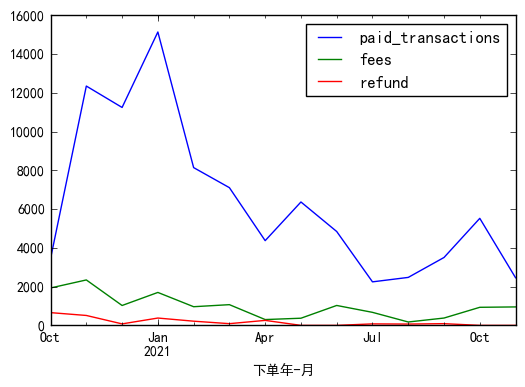

In [164]:
df_merge.plot(kind='line', x='下单年-月', y=['paid_transactions', 'fees', 'refund'])
plt.show()

In [165]:
# 构造字段
df_merge['fees/paid_transactions'] = df_merge['fees'] / df_merge['paid_transactions'] * 100
df_merge['refund/paid_transactions'] = df_merge['refund'] / df_merge['paid_transactions'] * 100
df_merge['(fees+refund)/paid_transactions'] = (df_merge['fees'] + df_merge['refund']) / df_merge['paid_transactions'] * 100

df_merge

,下单年-月,paid_transactions,fees,refund,deltaT,fees/paid_transactions,refund/paid_transactions,(fees+refund)/paid_transactions
66,2020-10,3447.41,1931.05,657.73,0,56.014515,19.078961,75.093476
67,2020-11,12351.93,2345.16,511.61,-1,18.986183,4.141944,23.128127
68,2020-12,11247.59,1026.40,76.88,-2,9.125510,0.683524,9.809035
69,2021-01,15142.44,1699.98,378.50,-3,11.226592,2.499597,13.726189
70,2021-02,8142.99,963.23,216.35,-4,11.828947,2.656886,14.485834
71,2021-03,7107.48,1069.17,88.72,-5,15.042884,1.248262,16.291147
72,2021-04,4372.83,299.97,257.27,-6,6.859860,5.883375,12.743235
73,2021-05,6368.57,369.48,0.00,-7,5.801616,0.000000,5.801616
74,2021-06,4844.64,1027.75,0.00,-8,21.214167,0.000000,21.214167
75,2021-07,2246.23,672.33,76.88,-9,29.931485,3.422624,33.354109


In [166]:
df_merge.columns

Index(['下单年-月', 'paid_transactions', 'fees', 'refund', 'deltaT',
       'fees/paid_transactions', 'refund/paid_transactions',
       '(fees+refund)/paid_transactions'],
      dtype='object')

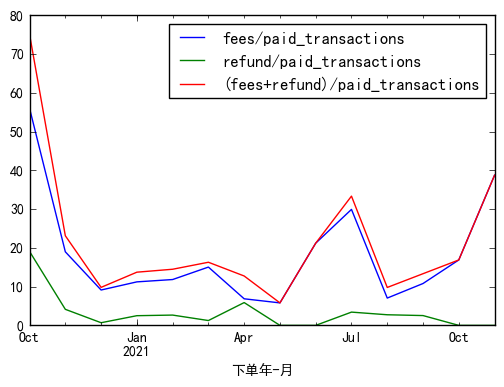

In [ ]:
df_merge.plot(kind='line', x='下单年-月', y=['fees/paid_transactions', 'refund/paid_transactions', '(fees+refund)/paid_transactions'])
plt.show()

# 母婴店数据

In [ ]:
# file_path
# file_path = 'D:\\Program Files (x86)\\百度云同步盘\\Dropbox\\-E·J- 2014.5.1\\2016.12.15 店小秘数据分析\\2021.10.31 母婴店数据'

# 读取店小秘订单列表.xlsx
excel_files = glob.glob(os.path.join(file_path, '2021.10.31 母婴店数据', "*.xlsx"))

df_order_list = []

# loop over the list of csv files
for f in excel_files:
      
    if '商品维度' not in f:
        # read the csv file
        df_order_xlsx = pd.read_excel(f)
        df_order_list.append(df_order_xlsx)
    
df_order_detail = pd.concat(df_order_list)
# df_order_detail.head()

In [ ]:
df_order_detail.columns

In [ ]:
# 添加筛选条件
df_order_detail = df_order_detail[(df_order_detail['物流订单号'] != '')
                                    &(df_order_detail['订单状态'] == '已发货')
                                    &(df_order_detail['订单金额'] !=0)
                                    &(df_order_detail['平台渠道'] == 'Shopee')
                                                   ]

# 下单时间->下单日期
df_order_detail['下单日期'] = pd.to_datetime(df_order_detail['下单时间']).dt.date
df_order_detail['下单日期-副本'] = pd.to_datetime(df_order_detail['下单时间']).dt.date
df_order_detail['下单年-月'] = pd.to_datetime(df_order_detail['下单时间']).dt.to_period('M')
df_order_detail['下单年-周'] = pd.to_datetime(df_order_detail['下单时间']).dt.strftime('%Y%U')


df_order_detail.head()

In [ ]:
# 周订单趋势
df_order_detail.groupby(['下单年-周']).agg({'订单号': 'count'}).plot(rot=45)
plt.show()

In [ ]:
# 币种
df_order_detail.groupby(['币种缩写']).agg({'订单号': 'count'}).reset_index().sort_values(by='订单号', ascending=False)

In [ ]:
# 周订单趋势 by country
df_order_detail.groupby(['下单年-周', '国家二字码']).agg({'订单号': 'count'}).reset_index().pivot(index='下单年-周', columns='国家二字码', values='订单号').plot(rot=45).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# 买家
df_order_detail.groupby(['收货人姓名', '收货人电话']).agg({'订单号': 'count', '下单日期': 'max', '下单日期-副本': 'min'}).reset_index().sort_values(by='订单号', ascending=False).to_csv('历史下单买家.csv', encoding='gb18030')

In [ ]:
# 买家，购买>=2单的买家占比
import numpy as np

df_buyer_detail = df_order_detail.groupby(['收货人姓名']).agg({'订单号': 'count'}).reset_index().sort_values(by='订单号', ascending=False)
df_buyer_detail['has_multiple_orders'] = np.where(df_buyer_detail['订单号']>=2,1,0)
df_buyer_detail.groupby(['has_multiple_orders'])['订单号'].count()

# 多数买家有复购

In [ ]:
# 买家，购买订单量分布
conditions = [
    (df_buyer_detail['订单号'] == 1),
    ((df_buyer_detail['订单号'] > 1) & (df_buyer_detail['订单号'] <= 5)),
    ((df_buyer_detail['订单号'] > 5) & (df_buyer_detail['订单号'] <= 10)),
    (df_buyer_detail['订单号'] > 10)
]

values = ['1', '1-5', '5-10', '10+']

df_buyer_detail['order_range'] = np.select(conditions, values)
df_buyer_detail.groupby(['order_range']).agg({'订单号': 'count'})